<a href="https://colab.research.google.com/github/Navin7899/Kobe-Bryant-NBA-shot-selection/blob/main/NBA_Shot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data=pd.read_csv('/content/drive/MyDrive/internship/PRCP-1008-NBAShotSelection.zip')

In [ ]:
data.head()

action_type combined_shot_type  game_event_id   game_id      lat  \
0          Jump Shot          Jump Shot             10  20000012  33.9723   
1          Jump Shot          Jump Shot             12  20000012  34.0443   
2          Jump Shot          Jump Shot             35  20000012  33.9093   
3          Jump Shot          Jump Shot             43  20000012  33.8693   
4  Driving Dunk Shot               Dunk            155  20000012  34.0443   

   loc_x  loc_y       lon  minutes_remaining  period  ...       shot_type  \
0    167     72 -118.1028                 10       1  ...  2PT Field Goal   
1   -157      0 -118.4268                 10       1  ...  2PT Field Goal   
2   -101    135 -118.3708                  7       1  ...  2PT Field Goal   
3    138    175 -118.1318                  6       1  ...  2PT Field Goal   
4      0      0 -118.2698                  6       2  ...  2PT Field Goal   

          shot_zone_area  shot_zone_basic  shot_zone_range     team_id  \
0          Right Side(R)        Mid-Range        16-24 ft.  1610612747   
1           Left Side(L)        Mid-Range         8-16 ft.  1610612747   
2   Left Side Center(LC)        Mid-Range        16-24 ft.  1610612747   
3  Right Side Center(RC)        Mid-Range        16-24 ft.  1610612747   
4              Center(C)  Restricted Area  Less Than 8 ft.  1610612747   

            team_name   game_date    matchup opponent  shot_id  
0  Los Angeles Lakers  2000-10-31  LAL @ POR      POR        1  
1  Los Angeles Lakers  2000-10-31  LAL @ POR      POR        2  
2  Los Angeles Lakers  2000-10-31  LAL @ POR      POR        3  
3  Los Angeles Lakers  2000-10-31  LAL @ POR      POR        4  
4  Los Angeles Lakers  2000-10-31  LAL @ POR      POR        5  

[5 rows x 25 columns]

In [ ]:
pd.set_option('display.max_columns',None)

In [ ]:
data

action_type combined_shot_type  game_event_id   game_id      lat  \
0              Jump Shot          Jump Shot             10  20000012  33.9723   
1              Jump Shot          Jump Shot             12  20000012  34.0443   
2              Jump Shot          Jump Shot             35  20000012  33.9093   
3              Jump Shot          Jump Shot             43  20000012  33.8693   
4      Driving Dunk Shot               Dunk            155  20000012  34.0443   
...                  ...                ...            ...       ...      ...   
30692          Jump Shot          Jump Shot            397  49900088  33.9963   
30693           Tip Shot           Tip Shot            398  49900088  34.0443   
30694  Running Jump Shot          Jump Shot            426  49900088  33.8783   
30695          Jump Shot          Jump Shot            448  49900088  33.7773   
30696          Jump Shot          Jump Shot            471  49900088  33.9723   

       loc_x  loc_y       lon  minutes_remaining  period  playoffs   season  \
0        167     72 -118.1028                 10       1         0  2000-01   
1       -157      0 -118.4268                 10       1         0  2000-01   
2       -101    135 -118.3708                  7       1         0  2000-01   
3        138    175 -118.1318                  6       1         0  2000-01   
4          0      0 -118.2698                  6       2         0  2000-01   
...      ...    ...       ...                ...     ...       ...      ...   
30692      1     48 -118.2688                  6       4         1  1999-00   
30693      0      0 -118.2698                  6       4         1  1999-00   
30694   -134    166 -118.4038                  3       4         1  1999-00   
30695     31    267 -118.2388                  2       4         1  1999-00   
30696      1     72 -118.2688                  0       4         1  1999-00   

       seconds_remaining  shot_distance  shot_made_flag       shot_type  \
0                     27             18             NaN  2PT Field Goal   
1                     22             15             0.0  2PT Field Goal   
2                     45             16             1.0  2PT Field Goal   
3                     52             22             0.0  2PT Field Goal   
4                     19              0             1.0  2PT Field Goal   
...                  ...            ...             ...             ...   
30692                  5              4             0.0  2PT Field Goal   
30693                  5              0             NaN  2PT Field Goal   
30694                 28             21             1.0  2PT Field Goal   
30695                 10             26             0.0  3PT Field Goal   
30696                 39              7             0.0  2PT Field Goal   

              shot_zone_area        shot_zone_basic  shot_zone_range  \
0              Right Side(R)              Mid-Range        16-24 ft.   
1               Left Side(L)              Mid-Range         8-16 ft.   
2       Left Side Center(LC)              Mid-Range        16-24 ft.   
3      Right Side Center(RC)              Mid-Range        16-24 ft.   
4                  Center(C)        Restricted Area  Less Than 8 ft.   
...                      ...                    ...              ...   
30692              Center(C)  In The Paint (Non-RA)  Less Than 8 ft.   
30693              Center(C)        Restricted Area  Less Than 8 ft.   
30694   Left Side Center(LC)              Mid-Range        16-24 ft.   
30695              Center(C)      Above the Break 3          24+ ft.   
30696              Center(C)  In The Paint (Non-RA)  Less Than 8 ft.   

          team_id           team_name   game_date      matchup opponent  \
0      1610612747  Los Angeles Lakers  2000-10-31    LAL @ POR      POR   
1      1610612747  Los Angeles Lakers  2000-10-31    LAL @ POR      POR   
2      1610612747  Los Angeles Lakers  2000-10-31    LAL @ POR      POR   
3      1610612747  Los An

**DOMAIN ANALYSIS**:



1. **ACTION TYPE** -  There are several different types of shot that player can take.

2. **COMBINED SHOT TYPE** - Combination of two shots.

3. **GAME EVENT ID** - It will be used to get the game event data.

4. **GAME ID** - It is a unique sequence used to identify your player profile in free to play games.

5. **LAT AND LONG** - Lat and Long will give co-ordinates to the place where game happened.

6. **LOC_X** - X is left-right along the endline with 0 centered at the basket (negative numbers left of the basket if the basket is on the bottom of the chart).

7. **LOC_Y** -  Y is positive towards halfcourt with 0 being at the basket (so very small negative numbers are possible, since the basket hangs just over the baseline).

8. **MINUTES REMAINING** - Minutes left in a given overall time.

9. **PERIOD** - A period in basketball is a block of time that a basketball game is made up of.There are four periods in an NBA game that last 12 minutes each.

10. **PLAYOFFS** - An additional match played to decide the outcome of a contest.

11. **SEASON** - In sports, a season is the part of one year that games of that sport are played.

12. **SECONDS REMAINING** - Seconds left in that minute.

13. **SHOT DISTANCE** - The shot is from the distance of an NBA three pointer (23 ft. 9 in.) Measures a team's point differential per 100 possessions.

14. **SHOT MADE FLAG** - Whether the player took a shot or not.

15. **SHOT TYPE** -  In basketball, a field goal is a basket scored on any shot or tap other than a free throw, worth two or three points depending on the distance of the attempt from the basket.

16. **SHOT ZONE AREA** -  The area of the field where player is able to take the shot at goal.

17. **SHOT ZONE BASIC** - With the use of only one hand, the shot should be released above the height of shoulder.

18. **SHOT ZONE RANGE** - Areas where they are most comfortable and confident in making shots.

19. **TEAM ID** - A TeamID is a unique identifier.

20. **TEAM NAME** - It is the name of a team in which player played for in a particular season.

21. **GAME DATE** - Date on which game happened.

22. **MATCHUP** - A sporting contest between two teams.

23. **OPPONENT** - Team that is competing against another team in a game.

24. **SHOT ID** - It is a unique id given to a particular shot.

**BASIC CHECKS**

In [ ]:
data.columns

Index(['action_type', 'combined_shot_type', 'game_event_id', 'game_id', 'lat',
       'loc_x', 'loc_y', 'lon', 'minutes_remaining', 'period', 'playoffs',
       'season', 'seconds_remaining', 'shot_distance', 'shot_made_flag',
       'shot_type', 'shot_zone_area', 'shot_zone_basic', 'shot_zone_range',
       'team_id', 'team_name', 'game_date', 'matchup', 'opponent', 'shot_id'],
      dtype='object')

In [ ]:
data.head()

action_type combined_shot_type  game_event_id   game_id      lat  \
0          Jump Shot          Jump Shot             10  20000012  33.9723   
1          Jump Shot          Jump Shot             12  20000012  34.0443   
2          Jump Shot          Jump Shot             35  20000012  33.9093   
3          Jump Shot          Jump Shot             43  20000012  33.8693   
4  Driving Dunk Shot               Dunk            155  20000012  34.0443   

   loc_x  loc_y       lon  minutes_remaining  period  playoffs   season  \
0    167     72 -118.1028                 10       1         0  2000-01   
1   -157      0 -118.4268                 10       1         0  2000-01   
2   -101    135 -118.3708                  7       1         0  2000-01   
3    138    175 -118.1318                  6       1         0  2000-01   
4      0      0 -118.2698                  6       2         0  2000-01   

   seconds_remaining  shot_distance  shot_made_flag       shot_type  \
0                 27             18             NaN  2PT Field Goal   
1                 22             15             0.0  2PT Field Goal   
2                 45             16             1.0  2PT Field Goal   
3                 52             22             0.0  2PT Field Goal   
4                 19              0             1.0  2PT Field Goal   

          shot_zone_area  shot_zone_basic  shot_zone_range     team_id  \
0          Right Side(R)        Mid-Range        16-24 ft.  1610612747   
1           Left Side(L)        Mid-Range         8-16 ft.  1610612747   
2   Left Side Center(LC)        Mid-Range        16-24 ft.  1610612747   
3  Right Side Center(RC)        Mid-Range        16-24 ft.  1610612747   
4              Center(C)  Restricted Area  Less Than 8 ft.  1610612747   

            team_name   game_date    matchup opponent  shot_id  
0  Los Angeles Lakers  2000-10-31  LAL @ POR      POR        1  
1  Los Angeles Lakers  2000-10-31  LAL @ POR      POR        2  
2  Los Angeles Lakers  2000-10-31  LAL @ POR      POR        3  
3  Los Angeles Lakers  2000-10-31  LAL @ POR      POR        4  
4  Los Angeles Lakers  2000-10-31  LAL @ POR      POR        5

In [ ]:
data.tail()

action_type combined_shot_type  game_event_id   game_id      lat  \
30692          Jump Shot          Jump Shot            397  49900088  33.9963   
30693           Tip Shot           Tip Shot            398  49900088  34.0443   
30694  Running Jump Shot          Jump Shot            426  49900088  33.8783   
30695          Jump Shot          Jump Shot            448  49900088  33.7773   
30696          Jump Shot          Jump Shot            471  49900088  33.9723   

       loc_x  loc_y       lon  minutes_remaining  period  playoffs   season  \
30692      1     48 -118.2688                  6       4         1  1999-00   
30693      0      0 -118.2698                  6       4         1  1999-00   
30694   -134    166 -118.4038                  3       4         1  1999-00   
30695     31    267 -118.2388                  2       4         1  1999-00   
30696      1     72 -118.2688                  0       4         1  1999-00   

       seconds_remaining  shot_distance  shot_made_flag       shot_type  \
30692                  5              4             0.0  2PT Field Goal   
30693                  5              0             NaN  2PT Field Goal   
30694                 28             21             1.0  2PT Field Goal   
30695                 10             26             0.0  3PT Field Goal   
30696                 39              7             0.0  2PT Field Goal   

             shot_zone_area        shot_zone_basic  shot_zone_range  \
30692             Center(C)  In The Paint (Non-RA)  Less Than 8 ft.   
30693             Center(C)        Restricted Area  Less Than 8 ft.   
30694  Left Side Center(LC)              Mid-Range        16-24 ft.   
30695             Center(C)      Above the Break 3          24+ ft.   
30696             Center(C)  In The Paint (Non-RA)  Less Than 8 ft.   

          team_id           team_name   game_date      matchup opponent  \
30692  1610612747  Los Angeles Lakers  2000-06-19  LAL vs. IND      IND   
30693  1610612747  Los Angeles Lakers  2000-06-19  LAL vs. IND      IND   
30694  1610612747  Los Angeles Lakers  2000-06-19  LAL vs. IND      IND   
30695  1610612747  Los Angeles Lakers  2000-06-19  LAL vs. IND      IND   
30696  1610612747  Los Angeles Lakers  2000-06-19  LAL vs. IND      IND   

       shot_id  
30692    30693  
30693    30694  
30694    30695  
30695    30696  
30696    30697

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30697 entries, 0 to 30696
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   action_type         30697 non-null  object 
 1   combined_shot_type  30697 non-null  object 
 2   game_event_id       30697 non-null  int64  
 3   game_id             30697 non-null  int64  
 4   lat                 30697 non-null  float64
 5   loc_x               30697 non-null  int64  
 6   loc_y               30697 non-null  int64  
 7   lon                 30697 non-null  float64
 8   minutes_remaining   30697 non-null  int64  
 9   period              30697 non-null  int64  
 10  playoffs            30697 non-null  int64  
 11  season              30697 non-null  object 
 12  seconds_remaining   30697 non-null  int64  
 13  shot_distance       30697 non-null  int64  
 14  shot_made_flag      25697 non-null  float64
 15  shot_type           30697 non-null  object 
 16  shot

**dtypes**: float64(3), int64(11), object(11)

In [ ]:
data.shape

(30697, 25)

In [ ]:
data.describe()

game_event_id       game_id           lat         loc_x         loc_y  \
count   30697.000000  3.069700e+04  30697.000000  30697.000000  30697.000000   
mean      249.190800  2.476407e+07     33.953192      7.110499     91.107535   
std       150.003712  7.755175e+06      0.087791    110.124578     87.791361   
min         2.000000  2.000001e+07     33.253300   -250.000000    -44.000000   
25%       110.000000  2.050008e+07     33.884300    -68.000000      4.000000   
50%       253.000000  2.090035e+07     33.970300      0.000000     74.000000   
75%       368.000000  2.960047e+07     34.040300     95.000000    160.000000   
max       659.000000  4.990009e+07     34.088300    248.000000    791.000000   

                lon  minutes_remaining        period      playoffs  \
count  30697.000000       30697.000000  30697.000000  30697.000000   
mean    -118.262690           4.885624      2.519432      0.146562   
std        0.110125           3.449897      1.153665      0.353674   
min     -118.519800           0.000000      1.000000      0.000000   
25%     -118.337800           2.000000      1.000000      0.000000   
50%     -118.269800           5.000000      3.000000      0.000000   
75%     -118.174800           8.000000      3.000000      0.000000   
max     -118.021800          11.000000      7.000000      1.000000   

       seconds_remaining  shot_distance  shot_made_flag       team_id  \
count       30697.000000   30697.000000    25697.000000  3.069700e+04   
mean           28.365085      13.437437        0.446161  1.610613e+09   
std            17.478949       9.374189        0.497103  0.000000e+00   
min             0.000000       0.000000        0.000000  1.610613e+09   
25%            13.000000       5.000000        0.000000  1.610613e+09   
50%            28.000000      15.000000        0.000000  1.610613e+09   
75%            43.000000      21.000000        1.000000  1.610613e+09   
max            59.000000      79.000000        1.000000  1.610613e+09   

            shot_id  
count  30697.000000  
mean   15349.000000  
std     8861.604943  
min        1.000000  
25%     7675.000000  
50%    15349.000000  
75%    23023.000000  
max    30697.000000

In [ ]:
data.describe(include='O')

action_type combined_shot_type   season       shot_type shot_zone_area  \
count        30697              30697    30697           30697          30697   
unique          57                  6       20               2              6   
top      Jump Shot          Jump Shot  2005-06  2PT Field Goal      Center(C)   
freq         18880              23485     2318           24271          13455   

       shot_zone_basic  shot_zone_range           team_name   game_date  \
count            30697            30697               30697       30697   
unique               7                5                   1        1559   
top          Mid-Range  Less Than 8 ft.  Los Angeles Lakers  2016-04-13   
freq             12625             9398               30697          50   

          matchup opponent  
count       30697    30697  
unique         74       33  
top     LAL @ SAS      SAS  
freq         1020     1978

The standard deviation of team id is 0. It implies that the no variation on the data and it will not affect the output.

In [ ]:
data.isnull().sum()

action_type              0
combined_shot_type       0
game_event_id            0
game_id                  0
lat                      0
loc_x                    0
loc_y                    0
lon                      0
minutes_remaining        0
period                   0
playoffs                 0
season                   0
seconds_remaining        0
shot_distance            0
shot_made_flag        5000
shot_type                0
shot_zone_area           0
shot_zone_basic          0
shot_zone_range          0
team_id                  0
team_name                0
game_date                0
matchup                  0
opponent                 0
shot_id                  0
dtype: int64

**shot_made_flag**  has 50000 null values

**EXPLORATORY DATA ANALYSIS**

**Univariate Analysis**

In [ ]:
integer_columns = data.select_dtypes(include=['int64','float64'])
integer_columns

game_event_id   game_id      lat  loc_x  loc_y       lon  \
0                 10  20000012  33.9723    167     72 -118.1028   
1                 12  20000012  34.0443   -157      0 -118.4268   
2                 35  20000012  33.9093   -101    135 -118.3708   
3                 43  20000012  33.8693    138    175 -118.1318   
4                155  20000012  34.0443      0      0 -118.2698   
...              ...       ...      ...    ...    ...       ...   
30692            397  49900088  33.9963      1     48 -118.2688   
30693            398  49900088  34.0443      0      0 -118.2698   
30694            426  49900088  33.8783   -134    166 -118.4038   
30695            448  49900088  33.7773     31    267 -118.2388   
30696            471  49900088  33.9723      1     72 -118.2688   

       minutes_remaining  period  playoffs  seconds_remaining  shot_distance  \
0                     10       1         0                 27             18   
1                     10       1         0                 22             15   
2                      7       1         0                 45             16   
3                      6       1         0                 52             22   
4                      6       2         0                 19              0   
...                  ...     ...       ...                ...            ...   
30692                  6       4         1                  5              4   
30693                  6       4         1                  5              0   
30694                  3       4         1                 28             21   
30695                  2       4         1                 10             26   
30696                  0       4         1                 39              7   

       shot_made_flag     team_id  shot_id  
0                 NaN  1610612747        1  
1                 0.0  1610612747        2  
2                 1.0  1610612747        3  
3                 0.0  1610612747        4  
4                 1.0  1610612747        5  
...               ...         ...      ...  
30692             0.0  1610612747    30693  
30693             NaN  1610612747    30694  
30694             1.0  1610612747    30695  
30695             0.0  1610612747    30696  
30696             0.0  1610612747    30697  

[30697 rows x 14 columns]

In [ ]:
numerical_cols=integer_columns.drop(['game_event_id','game_id','shot_made_flag','team_id','shot_id'],axis=1)

In [ ]:
numerical_cols

lat  loc_x  loc_y       lon  minutes_remaining  period  playoffs  \
0      33.9723    167     72 -118.1028                 10       1         0   
1      34.0443   -157      0 -118.4268                 10       1         0   
2      33.9093   -101    135 -118.3708                  7       1         0   
3      33.8693    138    175 -118.1318                  6       1         0   
4      34.0443      0      0 -118.2698                  6       2         0   
...        ...    ...    ...       ...                ...     ...       ...   
30692  33.9963      1     48 -118.2688                  6       4         1   
30693  34.0443      0      0 -118.2698                  6       4         1   
30694  33.8783   -134    166 -118.4038                  3       4         1   
30695  33.7773     31    267 -118.2388                  2       4         1   
30696  33.9723      1     72 -118.2688                  0       4         1   

       seconds_remaining  shot_distance  
0                     27             18  
1                     22             15  
2                     45             16  
3                     52             22  
4                     19              0  
...                  ...            ...  
30692                  5              4  
30693                  5              0  
30694                 28             21  
30695                 10             26  
30696                 39              7  

[30697 rows x 9 columns]

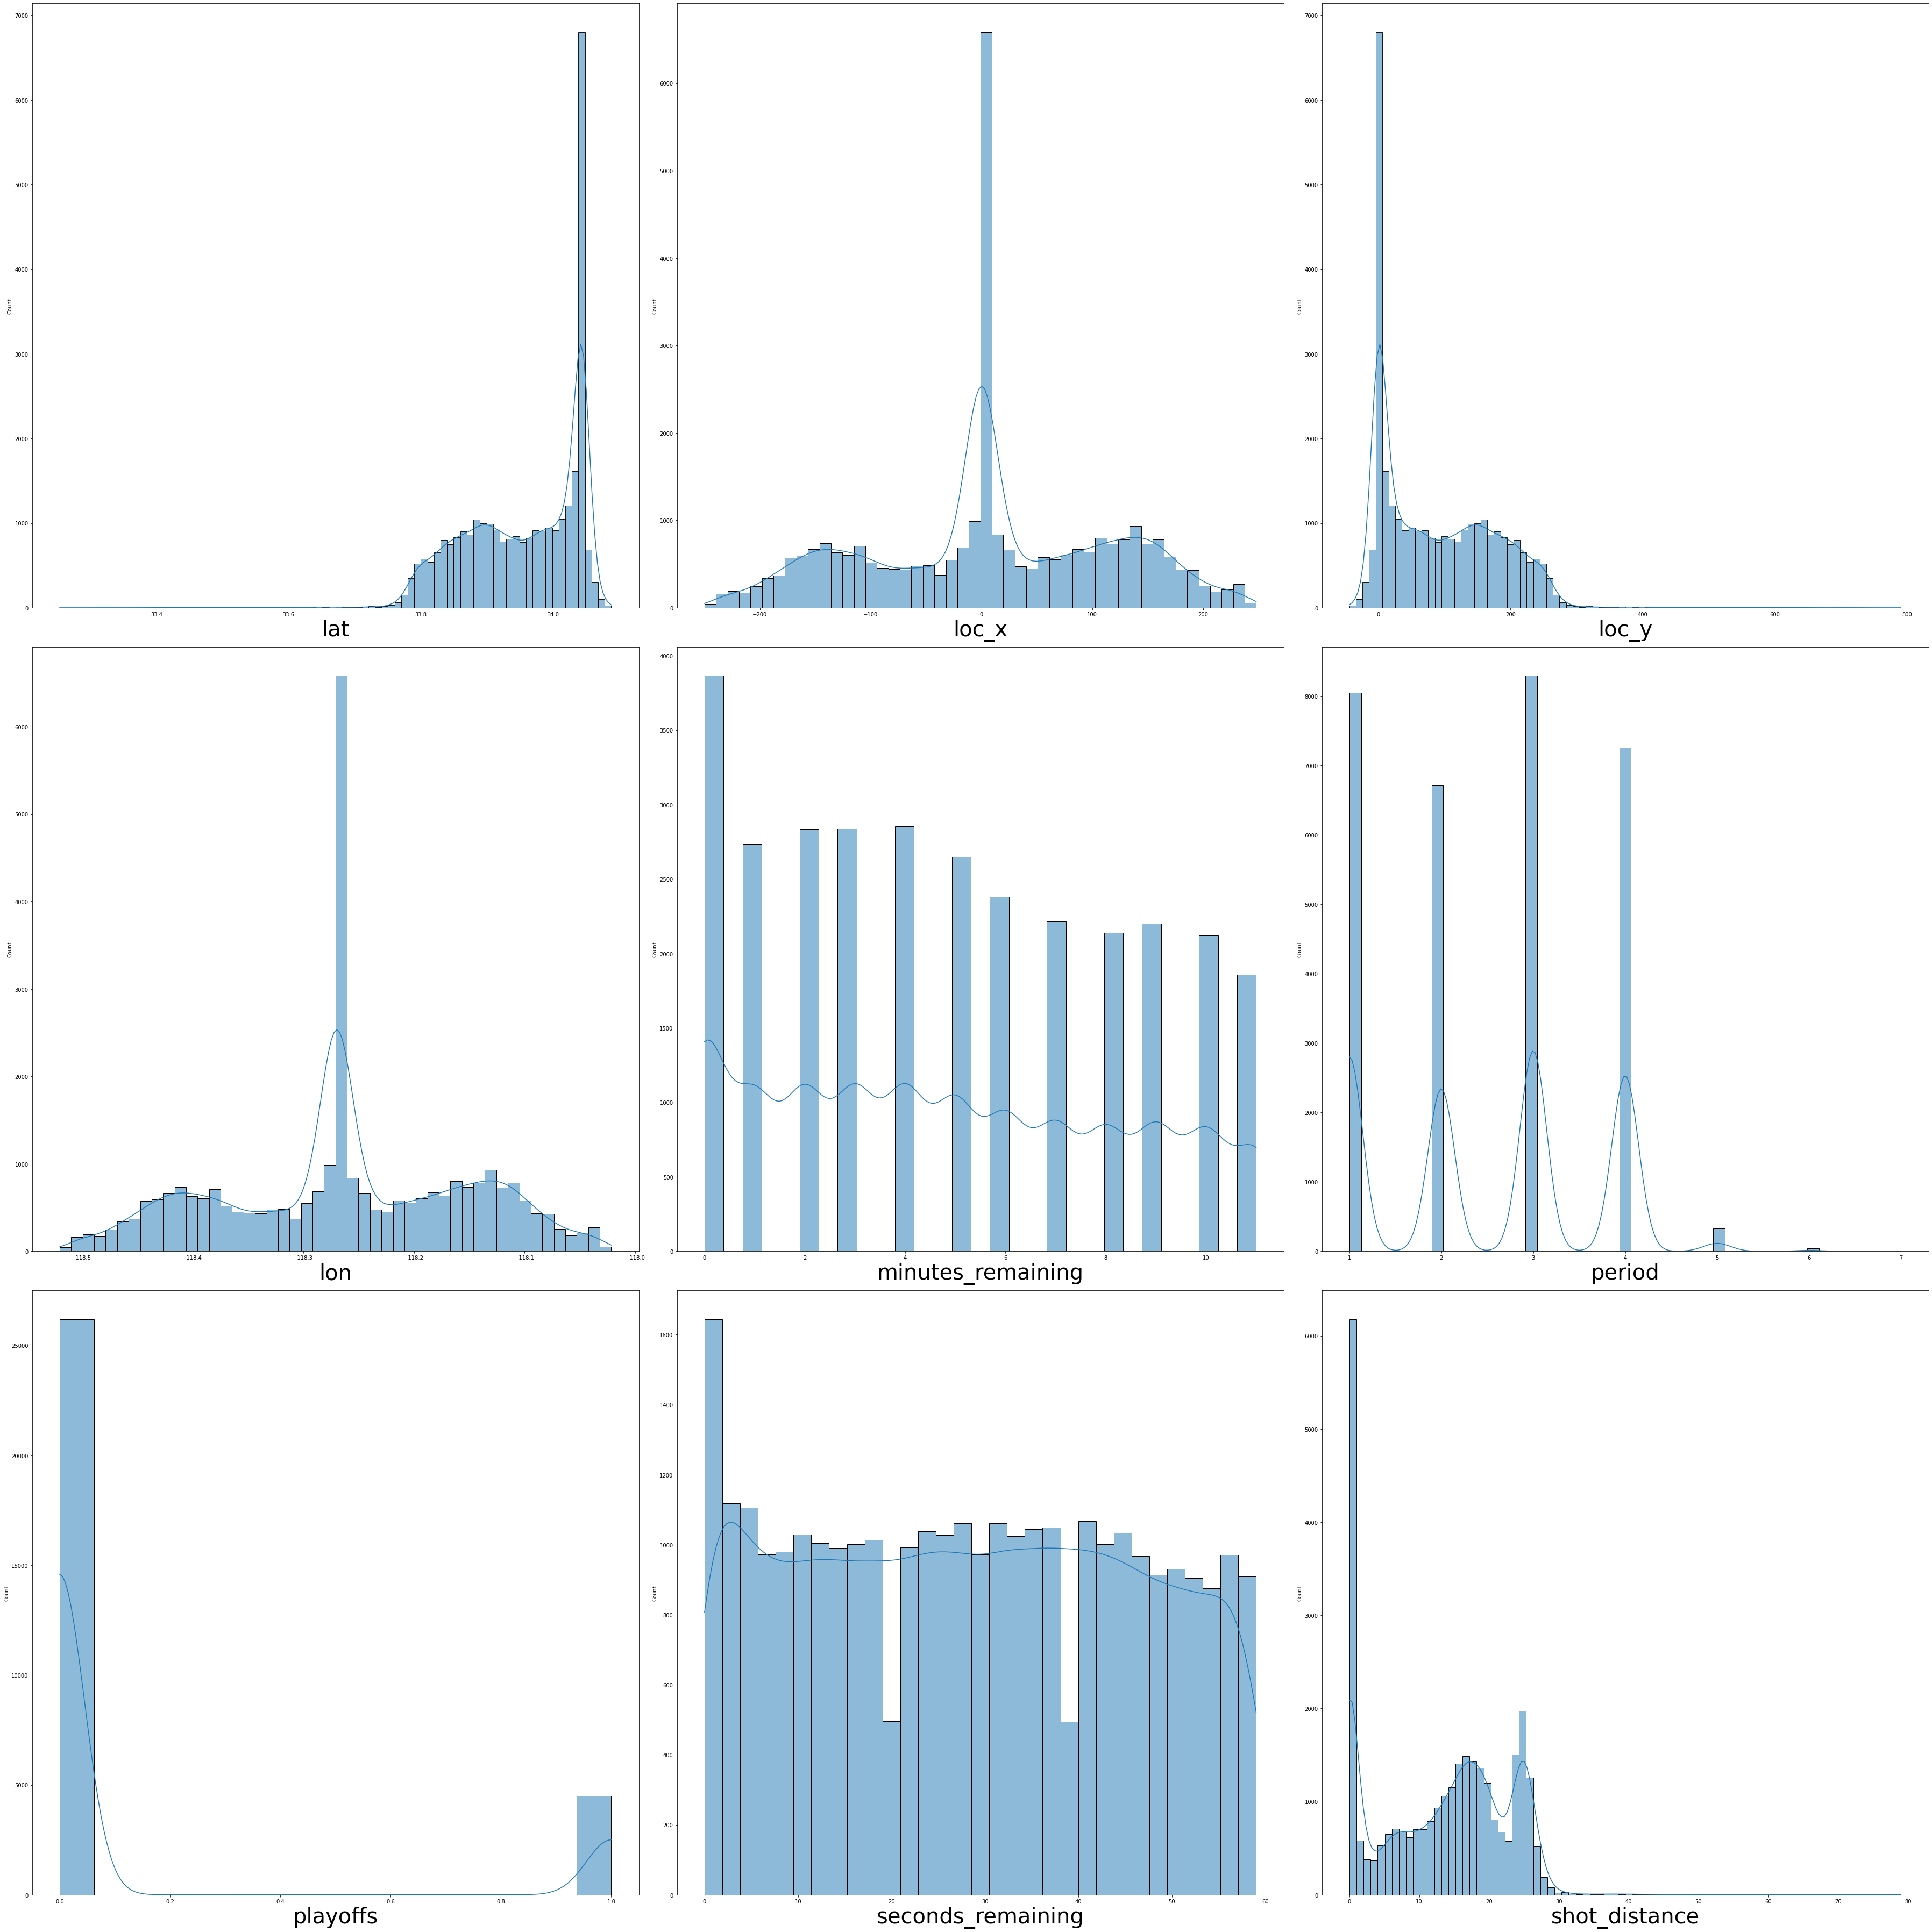

In [ ]:
plt.figure(figsize=(50, 50), facecolor='white')#canvas size
plotnumber = 1#count variable

for columns in numerical_cols:#for loop to acess columns form data1
    if plotnumber<=16:#checking whether count variable is less than 16 or not
        ax = plt.subplot(3, 3,plotnumber)#plotting 8 graphs in canvas(4 rows and 4 columns)
        sns.histplot(x=columns,data=numerical_cols #plotting count plot 
                        ,kde=True)
        plt.xlabel(columns,fontsize=40)#assigning name to x-axis and increasing it's font  
    plotnumber+=1#increasing counter
plt.tight_layout()

1. **lat column** is having left skewed distribution 
2. **loc_x column** is having normal distribution
3. **loc_y column** is having right skewed distribution
4. **lon column** is having normal distribution


In [ ]:
cat_columns = data.select_dtypes(include=['object'])
cat_columns

action_type combined_shot_type   season       shot_type  \
0              Jump Shot          Jump Shot  2000-01  2PT Field Goal   
1              Jump Shot          Jump Shot  2000-01  2PT Field Goal   
2              Jump Shot          Jump Shot  2000-01  2PT Field Goal   
3              Jump Shot          Jump Shot  2000-01  2PT Field Goal   
4      Driving Dunk Shot               Dunk  2000-01  2PT Field Goal   
...                  ...                ...      ...             ...   
30692          Jump Shot          Jump Shot  1999-00  2PT Field Goal   
30693           Tip Shot           Tip Shot  1999-00  2PT Field Goal   
30694  Running Jump Shot          Jump Shot  1999-00  2PT Field Goal   
30695          Jump Shot          Jump Shot  1999-00  3PT Field Goal   
30696          Jump Shot          Jump Shot  1999-00  2PT Field Goal   

              shot_zone_area        shot_zone_basic  shot_zone_range  \
0              Right Side(R)              Mid-Range        16-24 ft.   
1               Left Side(L)              Mid-Range         8-16 ft.   
2       Left Side Center(LC)              Mid-Range        16-24 ft.   
3      Right Side Center(RC)              Mid-Range        16-24 ft.   
4                  Center(C)        Restricted Area  Less Than 8 ft.   
...                      ...                    ...              ...   
30692              Center(C)  In The Paint (Non-RA)  Less Than 8 ft.   
30693              Center(C)        Restricted Area  Less Than 8 ft.   
30694   Left Side Center(LC)              Mid-Range        16-24 ft.   
30695              Center(C)      Above the Break 3          24+ ft.   
30696              Center(C)  In The Paint (Non-RA)  Less Than 8 ft.   

                team_name   game_date      matchup opponent  
0      Los Angeles Lakers  2000-10-31    LAL @ POR      POR  
1      Los Angeles Lakers  2000-10-31    LAL @ POR      POR  
2      Los Angeles Lakers  2000-10-31    LAL @ POR      POR  
3      Los Angeles Lakers  2000-10-31    LAL @ POR      POR  
4      Los Angeles Lakers  2000-10-31    LAL @ POR      POR  
...                   ...         ...          ...      ...  
30692  Los Angeles Lakers  2000-06-19  LAL vs. IND      IND  
30693  Los Angeles Lakers  2000-06-19  LAL vs. IND      IND  
30694  Los Angeles Lakers  2000-06-19  LAL vs. IND      IND  
30695  Los Angeles Lakers  2000-06-19  LAL vs. IND      IND  
30696  Los Angeles Lakers  2000-06-19  LAL vs. IND      IND  

[30697 rows x 11 columns]

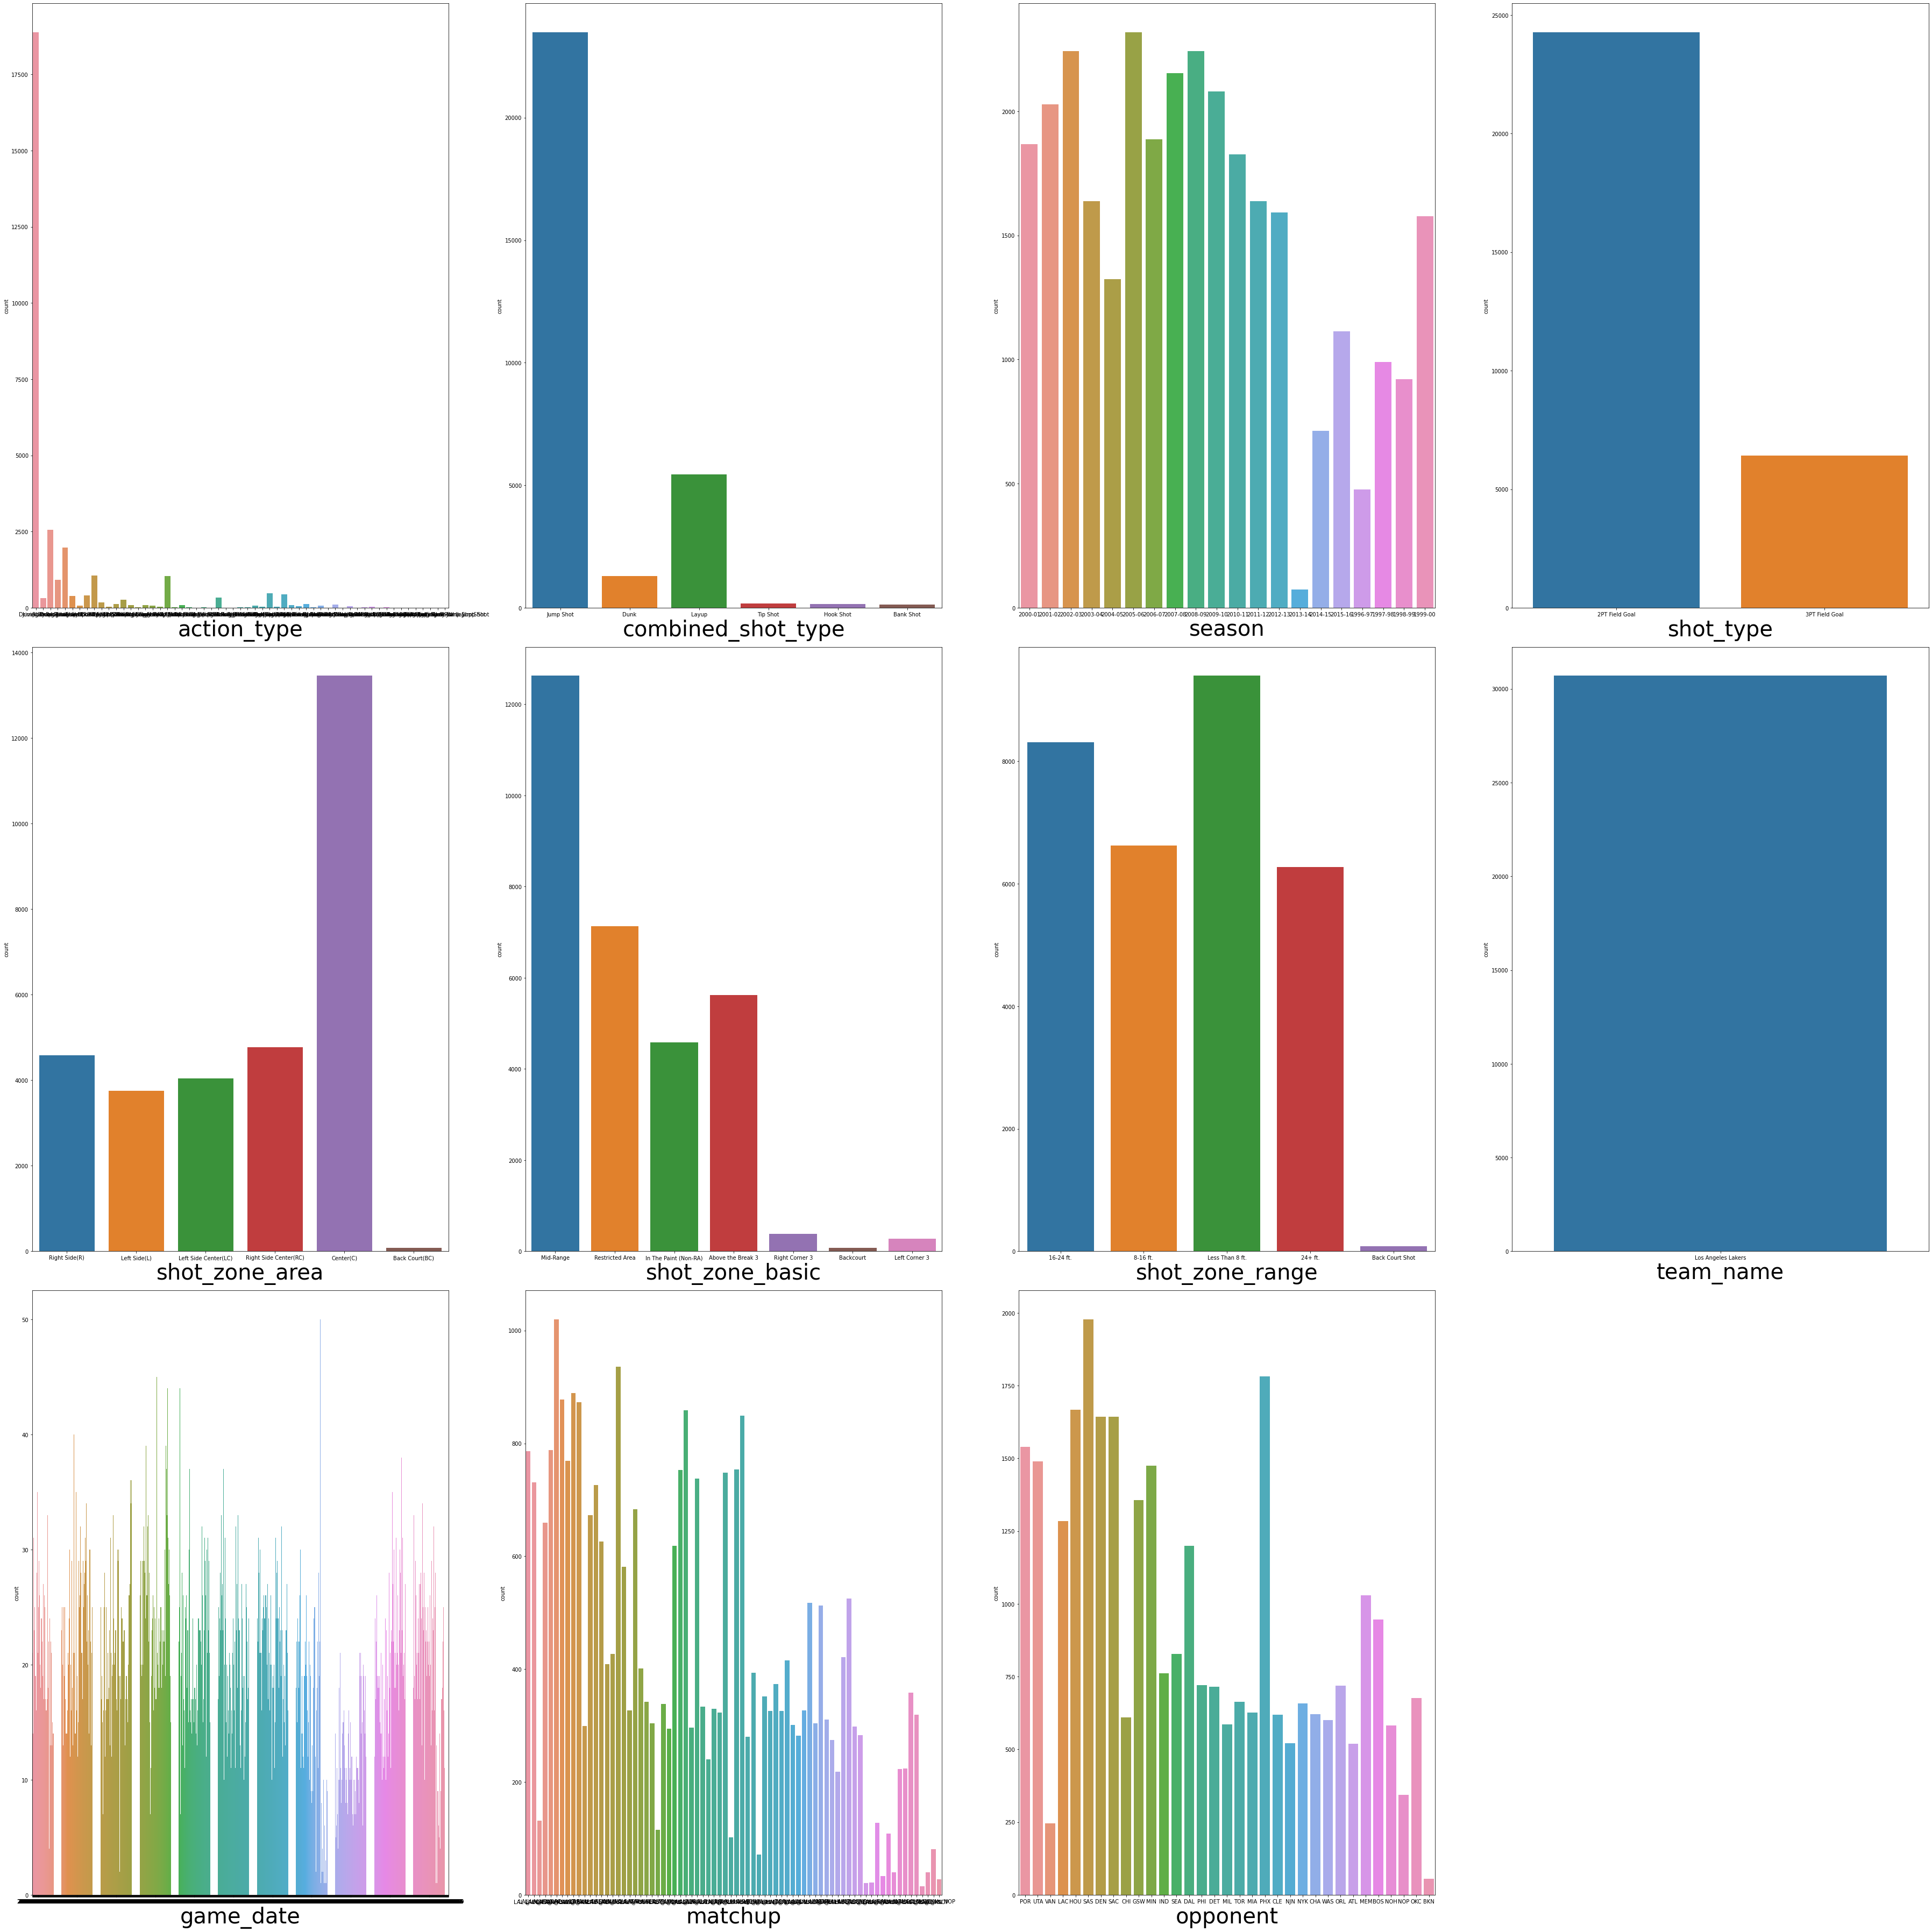

In [ ]:
plt.figure(figsize=(50, 50), facecolor='white')#canvas size
plotnumber = 1#count variable

for columns in cat_columns:#for loop to acess columns form data1
    if plotnumber<=11:#checking whether count variable is less than 16 or not
        ax = plt.subplot(3, 4,plotnumber)#plotting 11 graphs in canvas(3 rows and 4 columns)
        sns.countplot(x=columns,data=cat_columns) #plotting count plot 
        plt.xlabel(columns,fontsize=40)#assigning name to x-axis and increasing it's font  
    plotnumber+=1#increasing counter
plt.tight_layout()

1. In action_type there are more than 18000 times player used jump shot.

2. Player used more than 20000 times jump shot along with combination of other shot.
3. In 2013-14 player made very less attempts for basket 

4. Player made 2PT Field Goal majorly.

5. The majority attempts for basket made by the player from the center shot_zone_area.

6. The majority attempts for basket made by the player from the Mid-Range shot_zone_basic.

7.  The majority attempts for basket made by the player less than 8ft.

8. Player played majority of games against SAS.
 


**Bivariate Analysis**

In [ ]:
data.isnull().sum()

action_type              0
combined_shot_type       0
game_event_id            0
game_id                  0
lat                      0
loc_x                    0
loc_y                    0
lon                      0
minutes_remaining        0
period                   0
playoffs                 0
season                   0
seconds_remaining        0
shot_distance            0
shot_made_flag        5000
shot_type                0
shot_zone_area           0
shot_zone_basic          0
shot_zone_range          0
team_id                  0
team_name                0
game_date                0
matchup                  0
opponent                 0
shot_id                  0
dtype: int64

**shot_made_flag** is a target column and has 5000 missing values.Since it is being a target column and we are not going to impute missing values and we are removing those 5000 missing values. 

In [ ]:
data=data.dropna()

In [ ]:
data.shape

(25697, 25)

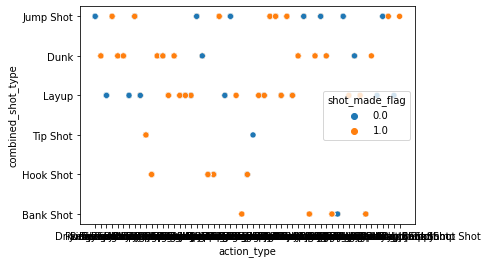

In [ ]:
sns.scatterplot(x='action_type',y='combined_shot_type',hue='shot_made_flag',data=data)

1. If Hook Shot is attempted,then basket is made.
2. If Bank Shot is attempted,then 80% of basket.
3. If Tip Shot is attempted, then there is 50% chances of basket.
4. Majority of shots taken in Layup,Dunk and Jump Shot.
5. When player is used Layup as a combined_shot_type, ther is more chances of basket.
6. When player is used Dunk as a combined_shot_type, ther is more chances of basket.
7. When player is used Jump Shot as a combined_shot_type, there is 55% chances of basket.

In [ ]:
len(data.action_type.value_counts())

55

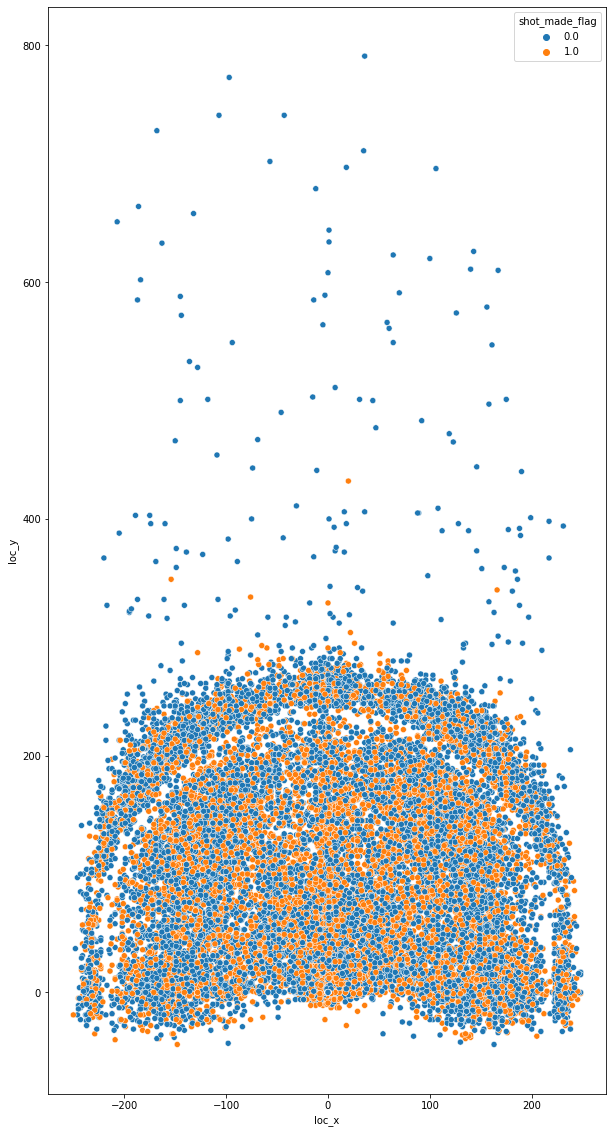

In [ ]:
plt.figure(figsize=(10,20))
sns.scatterplot(x='loc_x',y='loc_y',hue='shot_made_flag',data=data)

1. If loc_y is greater than 400, there is 99% chances of no basket.
2. Majority of baskets have made when loc_y is less than 300.

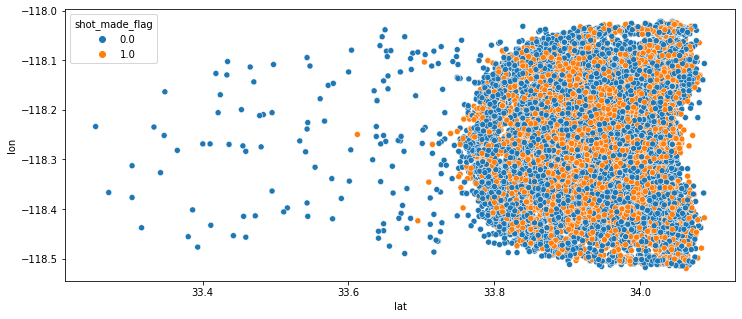

In [ ]:
plt.figure(figsize=(12,5))
sns.scatterplot(x='lat',y='lon',hue='shot_made_flag',data=data)

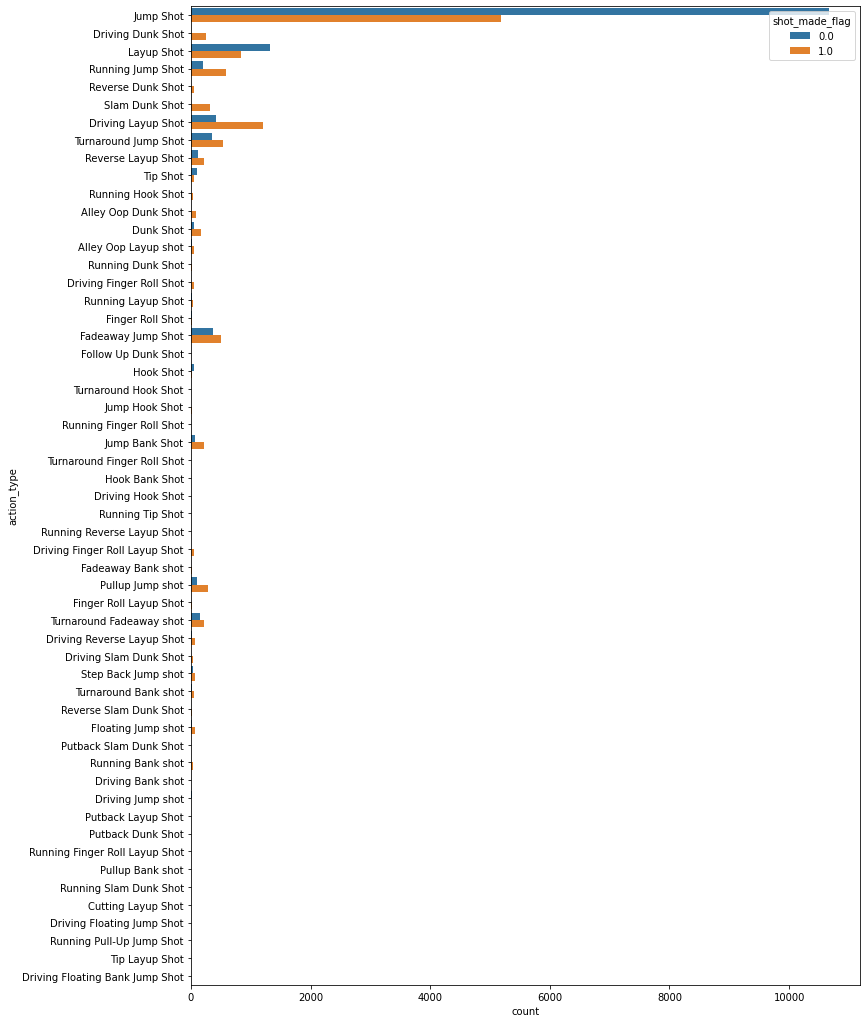

In [ ]:
plt.figure(figsize=(12,18))
sns.countplot(y="action_type", hue="shot_made_flag", data=data)

1. he majority of shots are made by Jump Shot and the majority of baskets are made in Jump Shot(action_type).
2. The second highest baskets are made in Driving Layup Shot.
3. In Bank Shot and Dunk Shot very few attempts were made.

In [ ]:
numerical_cols.columns

Index(['lat', 'loc_x', 'loc_y', 'lon', 'minutes_remaining', 'period',
       'playoffs', 'seconds_remaining', 'shot_distance'],
      dtype='object')

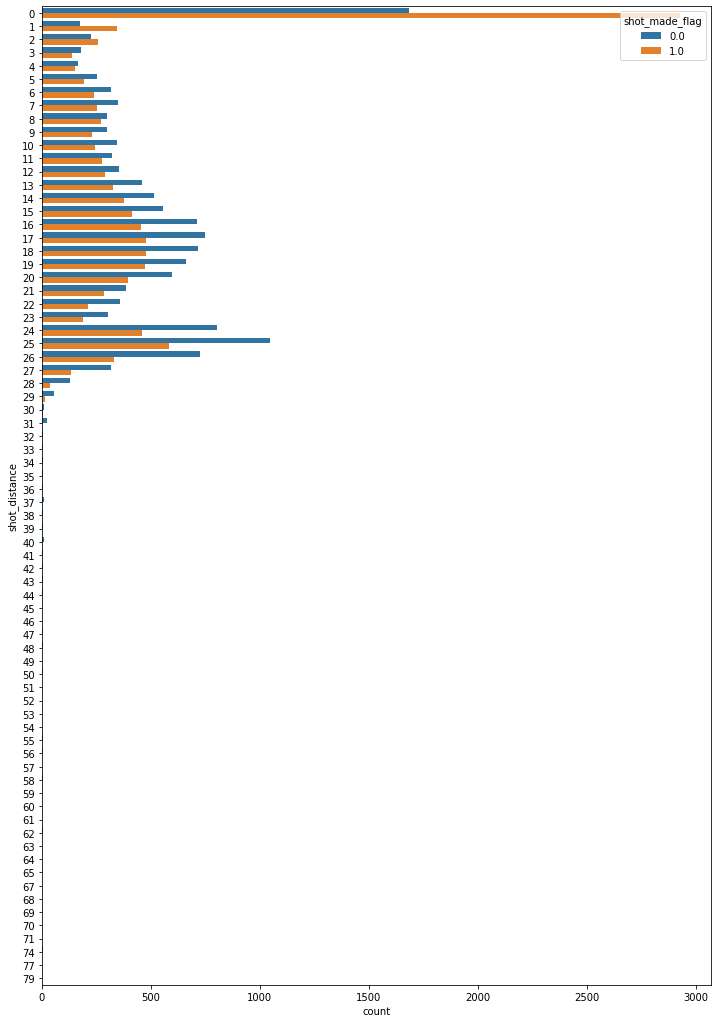

In [ ]:
plt.figure(figsize=(12,18))
sns.countplot(y="shot_distance", hue="shot_made_flag", data=data)

1. If shot_distance is more than 30, then the player has made very less attempts.
2. If shot_distance is less than 1, then maximum attempts were made.
3. If shot_distance is 25,then second maximum attempts were made.
4. Around 95% shots were made if shot_ditance is less than 30.

In [ ]:
data.columns

Index(['action_type', 'combined_shot_type', 'game_event_id', 'game_id', 'lat',
       'loc_x', 'loc_y', 'lon', 'minutes_remaining', 'period', 'playoffs',
       'season', 'seconds_remaining', 'shot_distance', 'shot_made_flag',
       'shot_type', 'shot_zone_area', 'shot_zone_basic', 'shot_zone_range',
       'team_id', 'team_name', 'game_date', 'matchup', 'opponent', 'shot_id'],
      dtype='object')

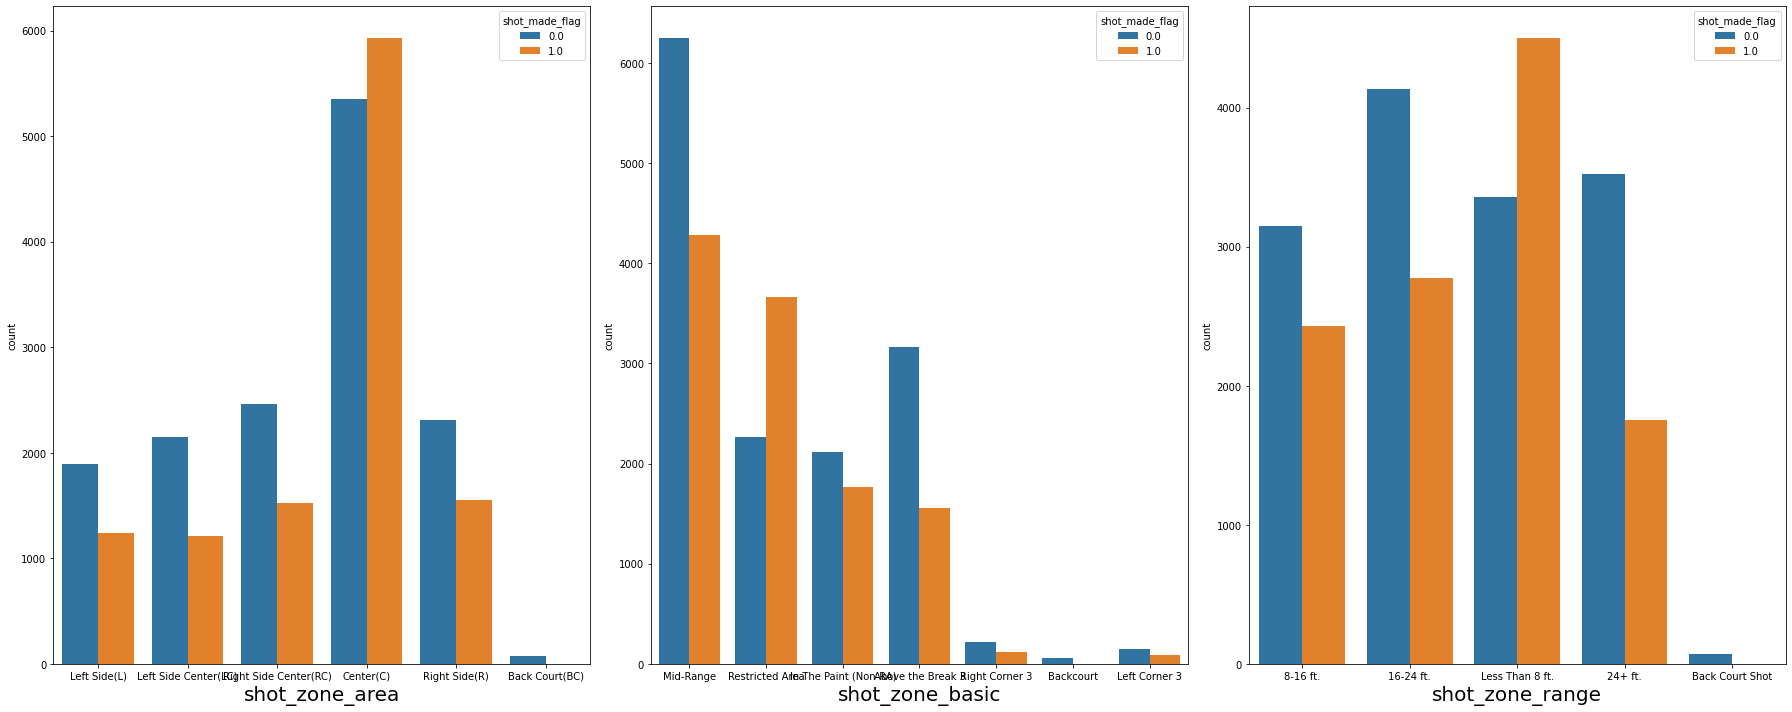

In [ ]:
cat1_cols= data[['shot_zone_area', 'shot_zone_basic', 'shot_zone_range','shot_made_flag']]
plt.figure(figsize=(25, 10), facecolor='white')#canvas size
plotnumber = 1#count variable

for columns in cat1_cols:#for loop to acess columns form cat1_cols
    if plotnumber<=3 :#checking whether count variable is less than 11 or not
        ax = plt.subplot(1,3,plotnumber)#plotting 3 graphs in canvas(1 rows and 3 columns)
        sns.countplot(x=columns,data=cat1_cols,hue='shot_made_flag')
        plt.xlabel(columns,fontsize=20)#assigning name to x-axis and increasing it's font 
        plotnumber+=1#increasing counter
plt.tight_layout()

## MULTIVARIATE ANALYSIS ##

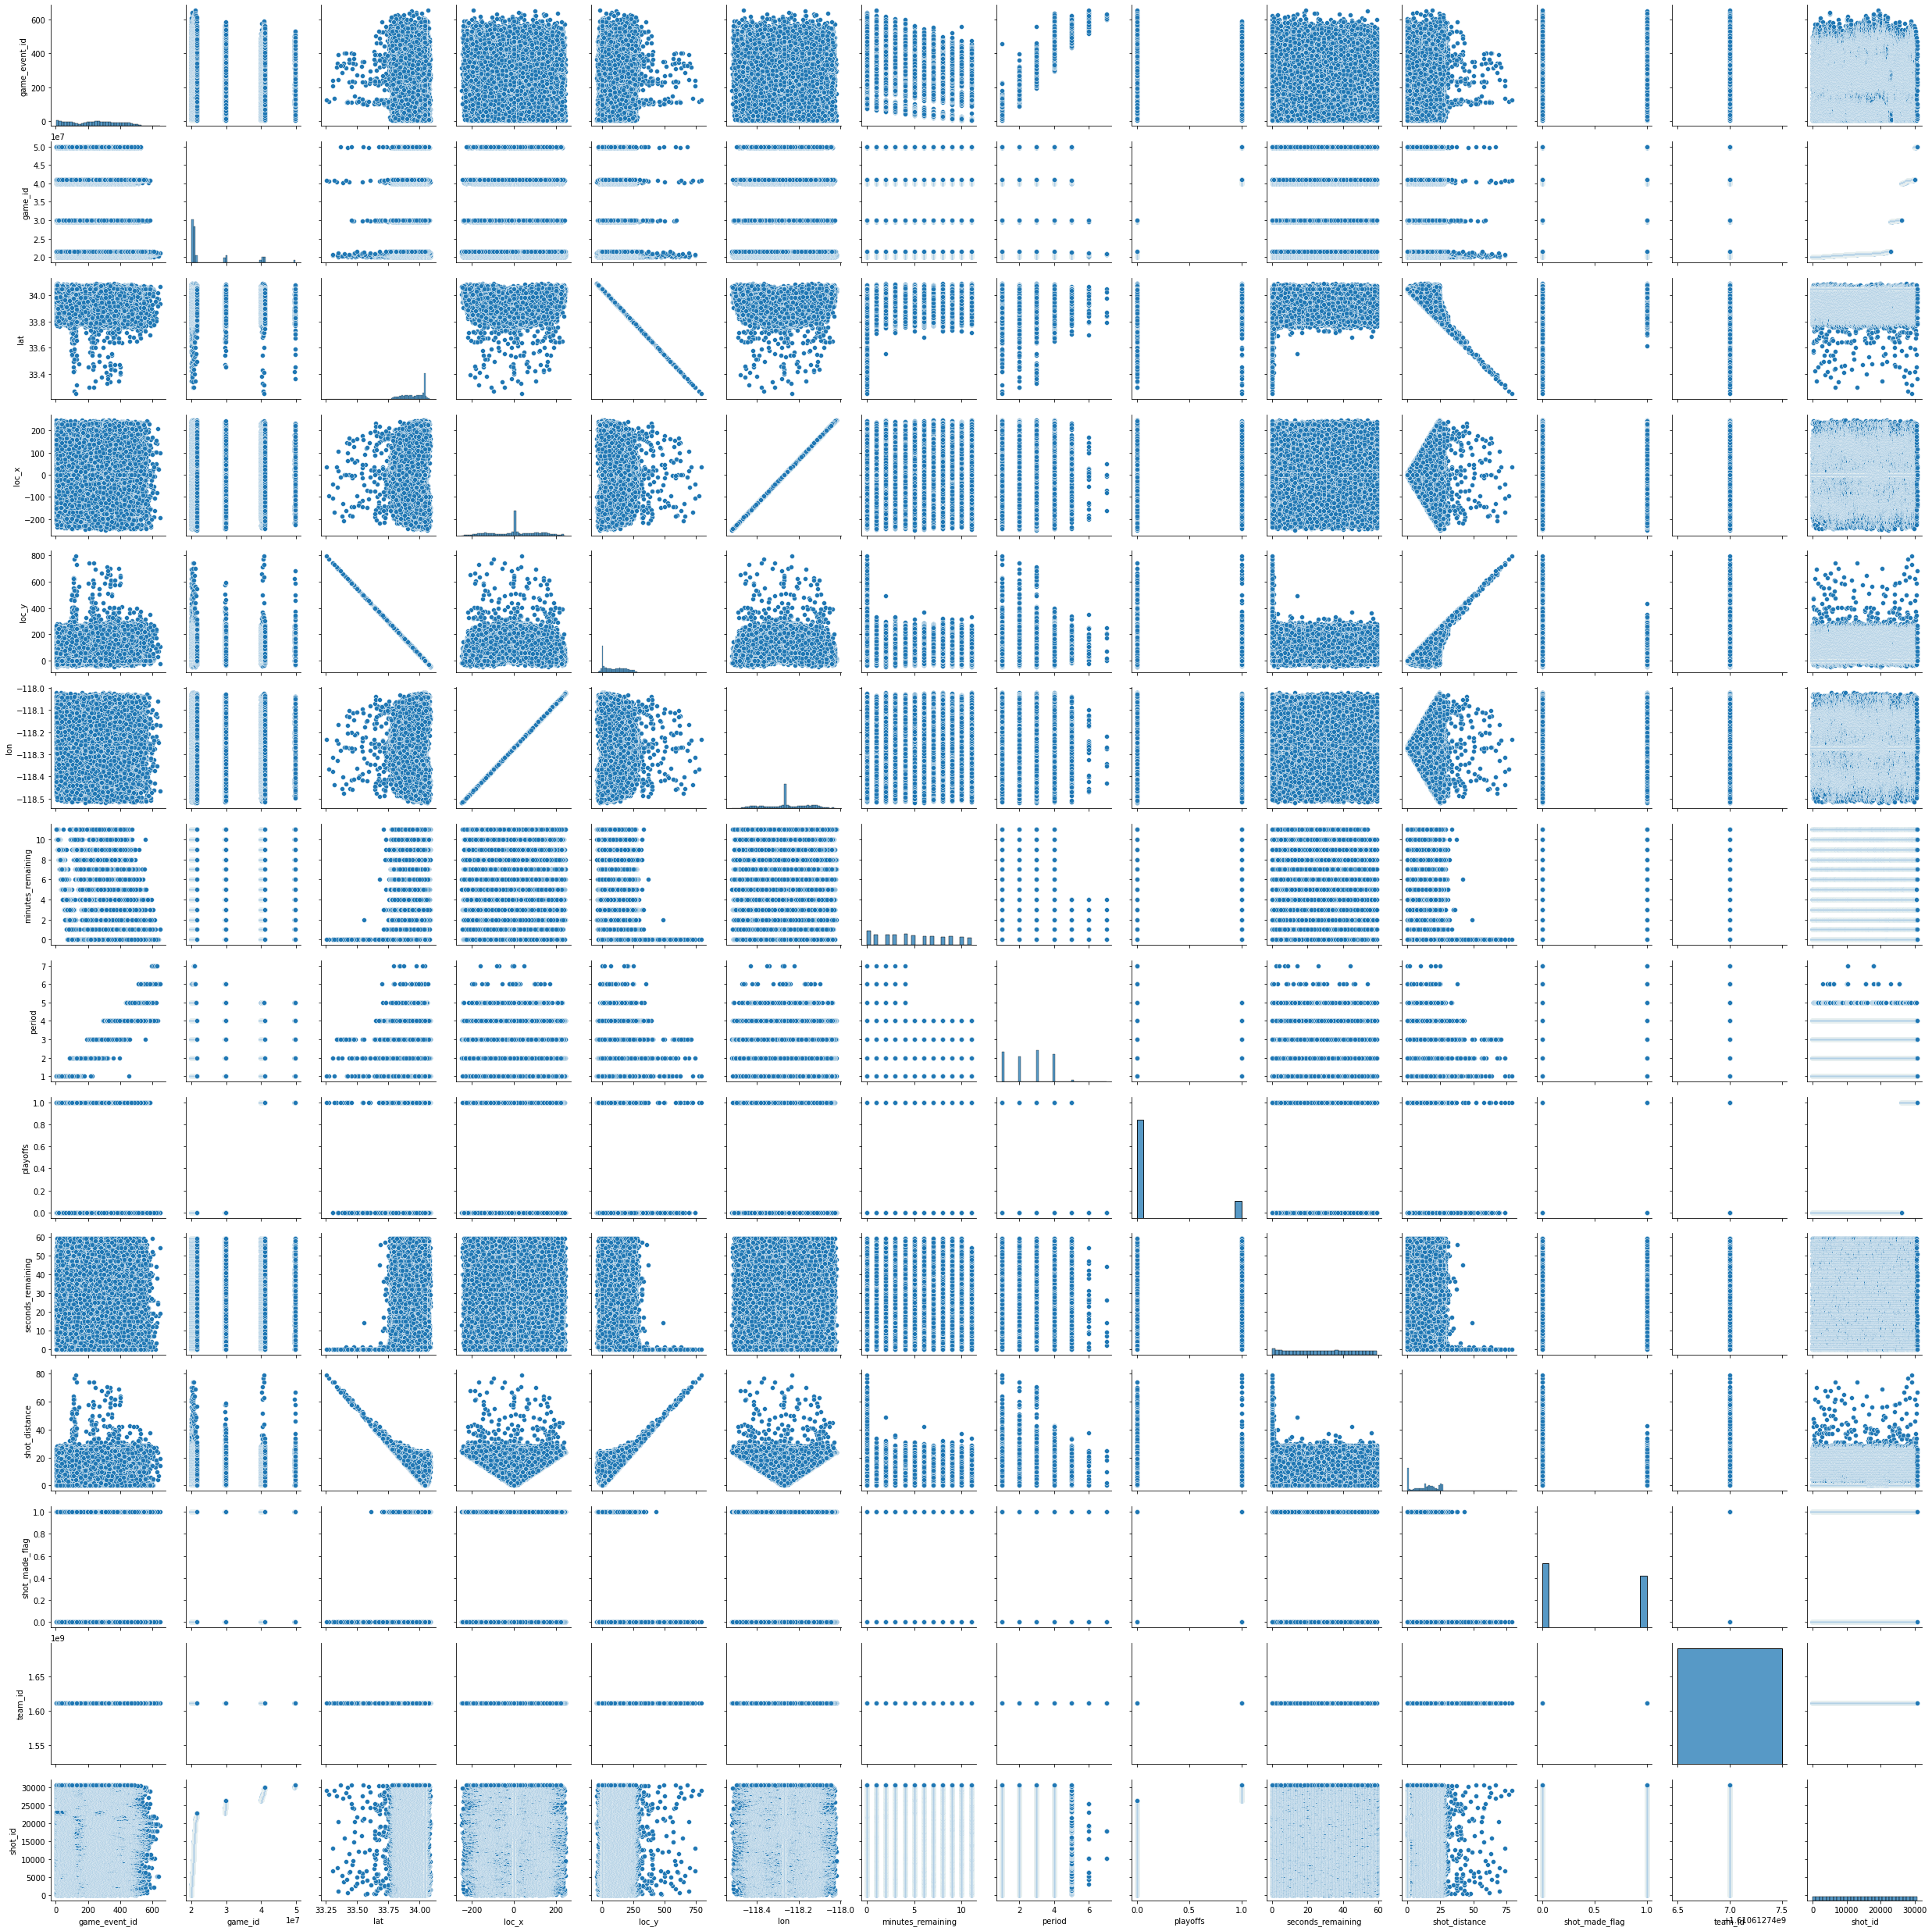

In [ ]:
sns.pairplot(data)
plt.show()

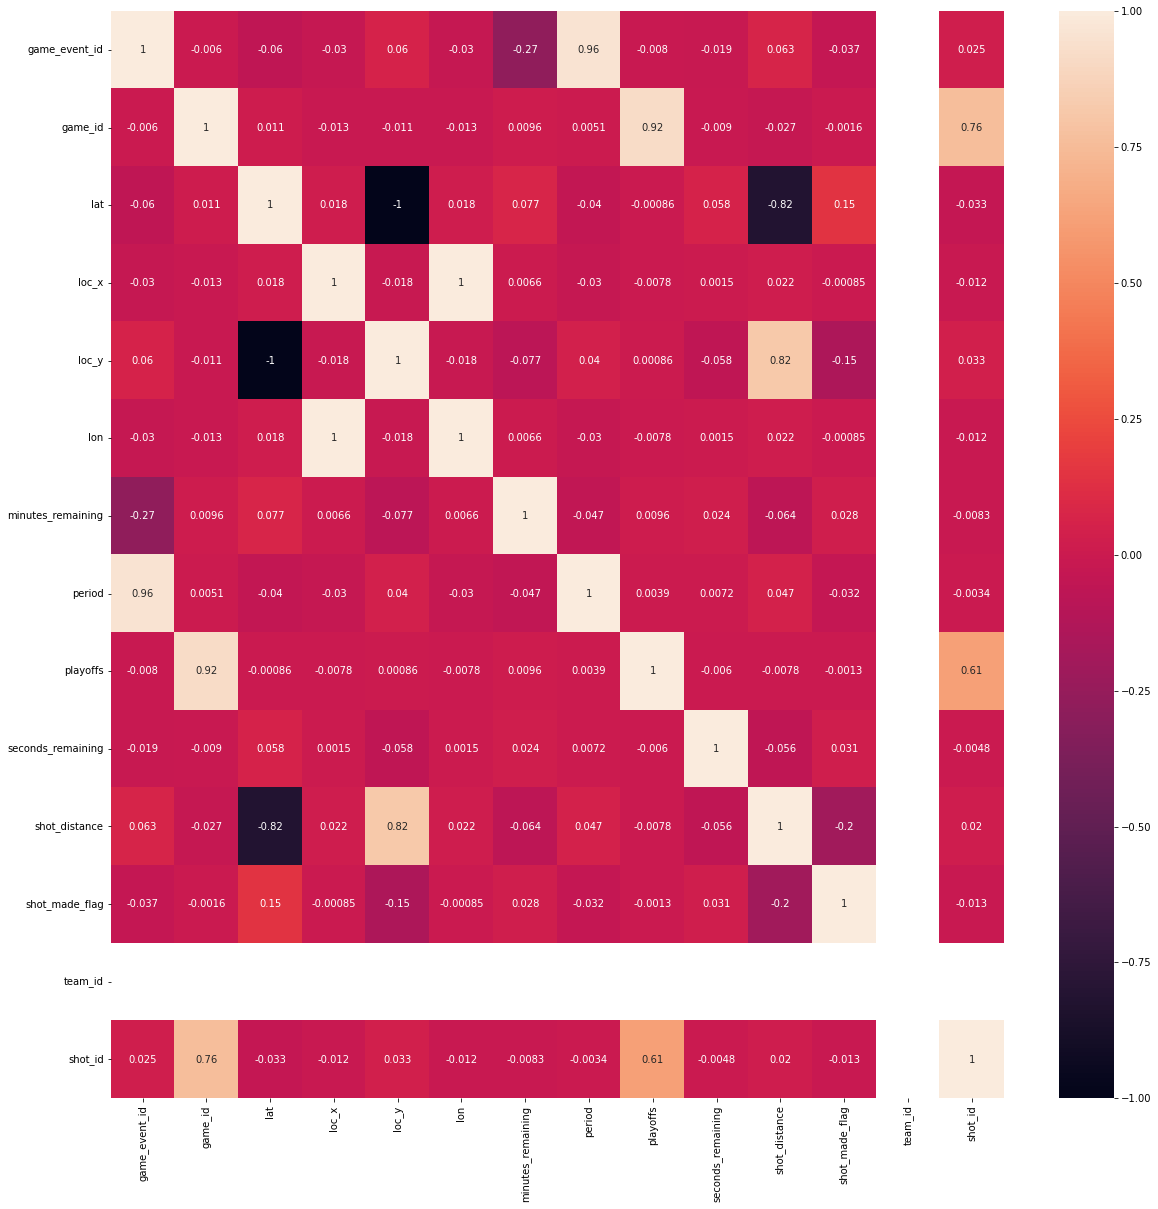

In [ ]:
plt.figure(figsize=(20, 20), facecolor='white')
sns.heatmap(data=data.corr(),annot=True)
plt.show()

**DATA PREPROCESSING AND FEATURE ENGINEERING**

**Handling missing values**

In [ ]:
data.isnull().sum()

action_type           0
combined_shot_type    0
game_event_id         0
game_id               0
lat                   0
loc_x                 0
loc_y                 0
lon                   0
minutes_remaining     0
period                0
playoffs              0
season                0
seconds_remaining     0
shot_distance         0
shot_made_flag        0
shot_type             0
shot_zone_area        0
shot_zone_basic       0
shot_zone_range       0
team_id               0
team_name             0
game_date             0
matchup               0
opponent              0
shot_id               0
dtype: int64

**There is no missing value in the data**

In [ ]:
df= data.drop(['game_event_id','game_id','lat','lon','team_id','shot_id','season','team_name','game_date','matchup'],axis=1)#,inplace=True)
df.head()

action_type combined_shot_type  loc_x  loc_y  minutes_remaining  \
1          Jump Shot          Jump Shot   -157      0                 10   
2          Jump Shot          Jump Shot   -101    135                  7   
3          Jump Shot          Jump Shot    138    175                  6   
4  Driving Dunk Shot               Dunk      0      0                  6   
5          Jump Shot          Jump Shot   -145    -11                  9   

   period  playoffs  seconds_remaining  shot_distance  shot_made_flag  \
1       1         0                 22             15             0.0   
2       1         0                 45             16             1.0   
3       1         0                 52             22             0.0   
4       2         0                 19              0             1.0   
5       3         0                 32             14             0.0   

        shot_type         shot_zone_area  shot_zone_basic  shot_zone_range  \
1  2PT Field Goal           Left Side(L)        Mid-Range         8-16 ft.   
2  2PT Field Goal   Left Side Center(LC)        Mid-Range        16-24 ft.   
3  2PT Field Goal  Right Side Center(RC)        Mid-Range        16-24 ft.   
4  2PT Field Goal              Center(C)  Restricted Area  Less Than 8 ft.   
5  2PT Field Goal           Left Side(L)        Mid-Range         8-16 ft.   

  opponent  
1      POR  
2      POR  
3      POR  
4      POR  
5      POR

**These are the columns we are dropping ('game_event_id','game_id','lat','lon','team_id','shot_id','season','team_name','game_date','matchup')**

1. game_event_id is 96% correlated with period so, we are dropping game_event_id.
2. game_id is** 92%** correlated with playoffs so, we are dropping game_id.
3. lat is 100% negatively correlated with loc_y so, we are dropping lat.
4. lon is 100% negatively correlated with loc_x so, we are dropping lon.
5. team_id is highly correlated with every other feature so, we are dropping team_id.
6. shot_id have unique value for each record so, it dosen't impact on target variable.
7. season,team_name,game_date dosen't have impact on target variable.
8. matchup and opponent will give same information so, we are dropping matchup.

In [ ]:
df.shape

(25697, 15)

**Handling outliers**

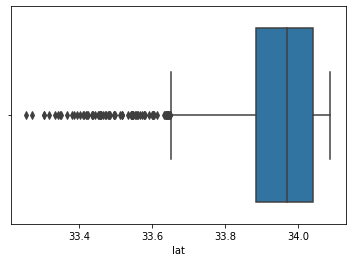

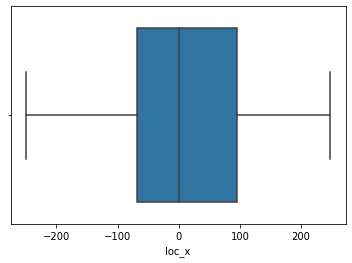

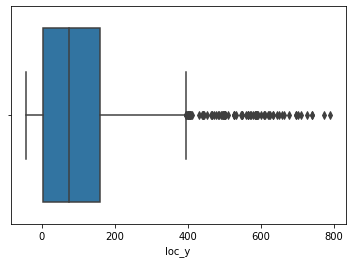

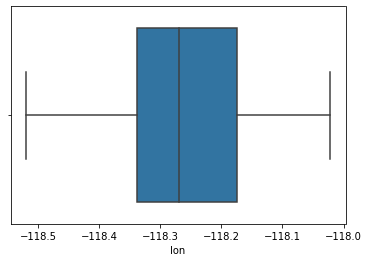

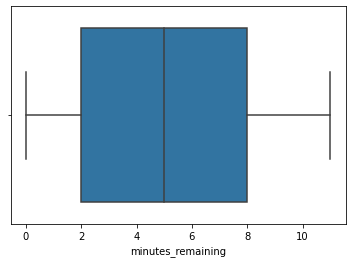

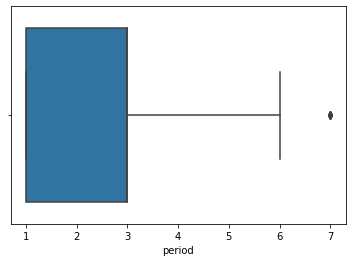

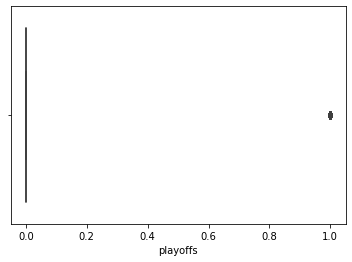

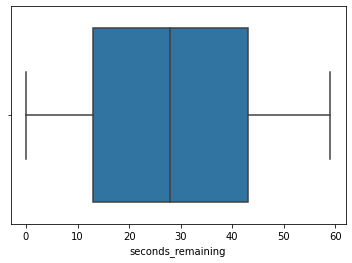

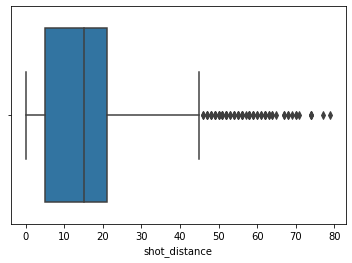

In [ ]:
for columns in numerical_cols:
  sns.boxplot(x= columns,data=numerical_cols)
  plt.show()

**The outliers in the data are (lat,loc_y,period,playoffs,shot_distance)**

**As,The dataset is related to distance parameter,we cannot handle outliers.**

**Scaling**

Scalilng is not required for our dataset as, there is no much variation in values.

**Encoding**

**Label Encoding**

In [ ]:
df.head(10)

action_type combined_shot_type  loc_x  loc_y  minutes_remaining  \
1           Jump Shot          Jump Shot   -157      0                 10   
2           Jump Shot          Jump Shot   -101    135                  7   
3           Jump Shot          Jump Shot    138    175                  6   
4   Driving Dunk Shot               Dunk      0      0                  6   
5           Jump Shot          Jump Shot   -145    -11                  9   
6          Layup Shot              Layup      0      0                  8   
8           Jump Shot          Jump Shot    -65    108                  6   
9   Running Jump Shot          Jump Shot    -33    125                  3   
10          Jump Shot          Jump Shot    -94    238                  1   
11          Jump Shot          Jump Shot    121    127                 11   

    period  playoffs  seconds_remaining  shot_distance  shot_made_flag  \
1        1         0                 22             15             0.0   
2        1         0                 45             16             1.0   
3        1         0                 52             22             0.0   
4        2         0                 19              0             1.0   
5        3         0                 32             14             0.0   
6        3         0                 52              0             1.0   
8        3         0                 12             12             1.0   
9        3         0                 36             12             0.0   
10       3         0                 56             25             0.0   
11       1         0                  0             17             1.0   

         shot_type         shot_zone_area        shot_zone_basic  \
1   2PT Field Goal           Left Side(L)              Mid-Range   
2   2PT Field Goal   Left Side Center(LC)              Mid-Range   
3   2PT Field Goal  Right Side Center(RC)              Mid-Range   
4   2PT Field Goal              Center(C)        Restricted Area   
5   2PT Field Goal           Left Side(L)              Mid-Range   
6   2PT Field Goal              Center(C)        Restricted Area   
8   2PT Field Goal           Left Side(L)  In The Paint (Non-RA)   
9   2PT Field Goal              Center(C)  In The Paint (Non-RA)   
10  3PT Field Goal   Left Side Center(LC)      Above the Break 3   
11  2PT Field Goal  Right Side Center(RC)              Mid-Range   

    shot_zone_range opponent  
1          8-16 ft.      POR  
2         16-24 ft.      POR  
3         16-24 ft.      POR  
4   Less Than 8 ft.      POR  
5          8-16 ft.      POR  
6   Less Than 8 ft.      POR  
8          8-16 ft.      POR  
9          8-16 ft.      POR  
10          24+ ft.      POR  
11        16-24 ft.      UTA

In [ ]:
from sklearn.preprocessing import LabelEncoder
lc=LabelEncoder()
df.shot_type=lc.fit_transform(df.shot_type)
df.shot_zone_range=lc.fit_transform(df.shot_zone_range)


**One hot Encoding**

In [ ]:
df=pd.get_dummies(data=df,drop_first=True)
df.head()

loc_x  loc_y  minutes_remaining  period  playoffs  seconds_remaining  \
1   -157      0                 10       1         0                 22   
2   -101    135                  7       1         0                 45   
3    138    175                  6       1         0                 52   
4      0      0                  6       2         0                 19   
5   -145    -11                  9       3         0                 32   

   shot_distance  shot_made_flag  shot_type  shot_zone_range  \
1             15             0.0          0                2   
2             16             1.0          0                0   
3             22             0.0          0                0   
4              0             1.0          0                4   
5             14             0.0          0                2   

   action_type_Alley Oop Layup shot  action_type_Cutting Layup Shot  \
1                                 0                               0   
2                                 0                               0   
3                                 0                               0   
4                                 0                               0   
5                                 0                               0   

   action_type_Driving Bank shot  action_type_Driving Dunk Shot  \
1                              0                              0   
2                              0                              0   
3                              0                              0   
4                              0                              1   
5                              0                              0   

   action_type_Driving Finger Roll Layup Shot  \
1                                           0   
2                                           0   
3                                           0   
4                                           0   
5                                           0   

   action_type_Driving Finger Roll Shot  \
1                                     0   
2                                     0   
3                                     0   
4                                     0   
5                                     0   

   action_type_Driving Floating Bank Jump Shot  \
1                                            0   
2                                            0   
3                                            0   
4                                            0   
5                                            0   

   action_type_Driving Floating Jump Shot  action_type_Driving Hook Shot  \
1                                       0                              0   
2                                       0                              0   
3                                       0                              0   
4                                       0                              0   
5                                       0                              0   

   action_type_Driving Jump shot  action_type_Driving Layup Shot  \
1                              0                               0   
2                              0                               0   
3                              0                               0   
4                              0                               0   
5                              0                               0   

   action_type_Driving Reverse Layup Shot  action_type_Driving Slam Dunk Shot  \
1                                       0                                   0   
2                                       0                                   0   
3                                       0                                   0   
4                                       0                                   0   
5                                       0                                   0   

   action_type_Dunk Shot  action_type_Fadeaway Bank shot  \
1                      0                               0   
2        

In [ ]:
df.shape

(25697, 112)

**Model Creation**

In [ ]:
X=df.drop(['shot_made_flag'],axis=1)
y=df.shot_made_flag

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X, y,random_state=33)

In [ ]:
y.value_counts()

0.0    14232
1.0    11465
Name: shot_made_flag, dtype: int64

**Balancing the data**

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()

In [ ]:
X_sm, y_sm = sm.fit_resample(X_train,y_train)

Counter is a container which keeps track to how many times equivalent values are added. Python counter class is a part of collections module and is a subclass of dictionary.

Actual Classes Counter({0.0: 10736, 1.0: 8536})
SMOTE Classes Counter({1.0: 10736, 0.0: 10736})


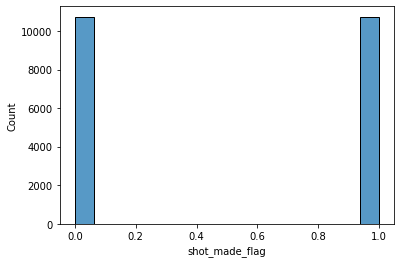

In [ ]:
from collections import Counter
print("Actual Classes",Counter(y_train))
print("SMOTE Classes",Counter(y_sm))
sns.histplot(y_sm)

**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()
clf.fit(X_sm,y_sm)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred=clf.predict(X_test)
y_pred

array([0., 0., 0., ..., 1., 0., 1.])

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,\
precision_score,classification_report,f1_score

In [ ]:
pd.crosstab(y_test,y_pred)

col_0            0.0   1.0
shot_made_flag            
0.0             2676   820
1.0             1389  1540

In [ ]:
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.66      0.77      0.71      3496
         1.0       0.65      0.53      0.58      2929

    accuracy                           0.66      6425
   macro avg       0.66      0.65      0.65      6425
weighted avg       0.66      0.66      0.65      6425



In [ ]:
acc=accuracy_score(y_test,y_pred)
acc

0.6561867704280155

**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier#importing decision tree from sklearn.tree

dt=DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf= 1, min_samples_split= 3, splitter= 'random')#object creation for decision tree  
dt.fit(X_sm,y_sm)#training the model
y_hat=dt.predict(X_test)
y_hat

array([0., 0., 0., ..., 0., 0., 1.])

In [ ]:
cr2=classification_report(y_test,y_hat)
print(cr2)

              precision    recall  f1-score   support

         0.0       0.66      0.80      0.72      3496
         1.0       0.68      0.50      0.57      2929

    accuracy                           0.66      6425
   macro avg       0.67      0.65      0.65      6425
weighted avg       0.67      0.66      0.65      6425



**HYPER PARAMETER TUNNING**

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
params = {
    "criterion":("gini", "entropy"), #quality of split
    "splitter":("best", "random"), # searches the features for a split
    "max_depth":(list(range(1, 20))), #depth of tree range from 1 to 19
    "min_samples_split":[2, 3, 4],    #the minimum number of samples required to split internal node
    "min_samples_leaf":list(range(1, 20)),#minimum number of samples required to be at a leaf node,we are passing list which is range from 1 to 19 
}


tree_clf = DecisionTreeClassifier(random_state=3)#object creation for decision tree with random state 3
tree_cv = GridSearchCV(tree_clf, params, scoring="f1", n_jobs=-1, verbose=1, cv=3)
#passing model to gridsearchCV ,
#tree_clf-->model
#params---->hyperparametes(dictinoary we created)
#scoring--->performance matrix to check performance
#n_jobs---->Number of jobs to run in parallel,-1 means using all processors.
#verbose=Controls the verbosity: the higher, the more messages.
#>1 : the computation time for each fold and parameter candidate is displayed;
#>2 : the score is also displayed;
#>3 : the fold and candidate parameter indexes are also displayed together with the starting time of the computation.
#cv------> number of folds




tree_cv.fit(X_sm,y_sm)#training data on gridsearch cv
best_params = tree_cv.best_params_#it will give you best parameters 
print(f"Best paramters: {best_params})")#printing  best parameters

Fitting 3 folds for each of 4332 candidates, totalling 12996 fits


In [ ]:
tree_cv.best_params_#getting best parameters from cv

In [ ]:
tree_cv.best_score_#getting best score from cv

In [ ]:
dt1=DecisionTreeClassifier(criterion='gini',max_depth=1,min_samples_leaf= 1,min_samples_split=2,splitter='best')#passing best parameter to decision tree

In [ ]:
dt1.fit(X_sm,y_sm)#training model with best parameter

In [ ]:
y_p_tr = dt1.predict(X_test)

In [ ]:
train_f1=f1_score(y_test,y_p_tr)

In [ ]:
train_f1

In [ ]:
y_hat1=dt1.predict(X_test)

In [ ]:
acc_test=accuracy_score(y_test,y_hat1)#checking accuracy
acc_test

In [ ]:
test_f1=f1_score(y_test,y_hat1)#f1_score
test_f1

In [ ]:
print(classification_report(y_test,y_hat1))

**Random Forest Classifier**

In [75]:
from sklearn.ensemble import RandomForestClassifier#importing randomforest

rf_clf = RandomForestClassifier(n_estimators=100)#object creation ,taking 100 decision tree in random forest 
rf_clf.fit(X_sm,y_sm)

RandomForestClassifier()

In [76]:
y_p=rf_clf.predict(X_test)
y_p

array([1., 0., 0., ..., 0., 0., 1.])

In [77]:
cr1=classification_report(y_test,y_p)
print(cr1)

              precision    recall  f1-score   support

         0.0       0.65      0.73      0.69      3496
         1.0       0.62      0.52      0.57      2929

    accuracy                           0.64      6425
   macro avg       0.63      0.63      0.63      6425
weighted avg       0.63      0.64      0.63      6425



**Hyper parameter tunning**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]       #Number of decision trees
max_features = ['log2', 'sqrt']                                  #maximum number of features allowed to try in individual tree
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]      #List Comprehension-using for loop in list
min_samples_split = [2, 5, 10]#minimum number of samples required to split an internal node
min_samples_leaf = [1, 2, 4]#minimum number of samples required to be at a leaf node.


#dictionary for hyperparameters
random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

rf_clf1 = RandomForestClassifier(random_state=42)#model

rf_cv = RandomizedSearchCV(estimator=rf_clf1, scoring='f1',param_distributions=random_grid, n_iter=100, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)

rf_cv.fit(X_sm, y_sm)                                  ##training data on randomsearch cv
rf_best_params = rf_cv.best_params_                          ##it will give you best parameters 
print(f"Best paramters: {rf_best_params})")

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.8/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


In [ ]:
#passing best parameter to randomforest
rf_clf2 = RandomForestClassifier(n_estimators= 1800, min_samples_split= 2, min_samples_leaf= 1, 
                                 max_features= 'log2', max_depth= 40)



rf_clf2.fit(X_sm, y_sm)

y_predict=rf_clf2.predict(X_test)
y_predict

In [ ]:
acc_rf= accuracy_score(y_test,y_predict)
acc_rf

In [ ]:
print(classification_report(y_test,y_predict))

**SVM**

In [63]:
from sklearn.svm import SVC
svclassifier = SVC() ## base model with default parameters
svclassifier.fit(X_sm, y_sm)

SVC()

In [64]:
y_hat=svclassifier.predict(X_test)
y_hat

array([0., 0., 0., ..., 1., 0., 1.])

In [65]:
from sklearn.metrics import accuracy_score,classification_report,f1_score
acc=accuracy_score(y_test,y_hat)
acc

0.5950194552529183

In [66]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

         0.0       0.61      0.72      0.66      3496
         1.0       0.57      0.45      0.50      2929

    accuracy                           0.60      6425
   macro avg       0.59      0.58      0.58      6425
weighted avg       0.59      0.60      0.59      6425



In [67]:
cm1=pd.crosstab(y_test,y_hat)
cm1

col_0            0.0   1.0
shot_made_flag            
0.0             2508   988
1.0             1614  1315

In [68]:
f1=f1_score(y_test,y_hat)
f1

0.5026758409785932

In [69]:
## checking cross validation score
from sklearn.model_selection import cross_val_score

scores = cross_val_score(svclassifier,X,y,cv=3,scoring='f1')
print(scores)
print("Cross validation Score:",scores.mean())
print("Std :",scores.std())
#std of < 0.05 is good. 

[0.44326828 0.39344262 0.43219178]
Cross validation Score: 0.42296756010640485
Std : 0.021361392353417805


In [ ]:
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001]} 

grid = GridSearchCV(SVC(random_state=42), param_grid, verbose =3,scoring='f1',cv=3)
  
# fitting the model for grid search
grid.fit(X_sm, y_sm)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV 1/3] END ....................C=0.1, gamma=1;, score=0.004 total time=  47.0s
[CV 2/3] END ....................C=0.1, gamma=1;, score=0.000 total time=  48.6s
[CV 3/3] END ....................C=0.1, gamma=1;, score=0.667 total time=  48.8s
[CV 1/3] END ..................C=0.1, gamma=0.1;, score=0.330 total time=  53.7s
[CV 2/3] END ..................C=0.1, gamma=0.1;, score=0.327 total time=  54.4s
[CV 3/3] END ..................C=0.1, gamma=0.1;, score=0.332 total time=  52.8s
[CV 1/3] END .................C=0.1, gamma=0.01;, score=0.397 total time=  52.9s
[CV 2/3] END .................C=0.1, gamma=0.01;, score=0.404 total time=  52.9s
[CV 3/3] END .................C=0.1, gamma=0.01;, score=0.396 total time=  53.3s
[CV 1/3] END ................C=0.1, gamma=0.001;, score=0.502 total time=  45.4s
[CV 2/3] END ................C=0.1, gamma=0.001;, score=0.496 total time=  43.0s
[CV 3/3] END ................C=0.1, gamma=0.001;

GridSearchCV(cv=3, estimator=SVC(random_state=42),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             scoring='f1', verbose=3)

In [71]:
clf=SVC(C=10, gamma=0.01, random_state=42) 

In [72]:
clf.fit(X_sm, y_sm)

SVC(C=10, gamma=0.01, random_state=42)

In [73]:
y_clf=clf.predict(X_test)

In [74]:
print(classification_report(y_test,y_clf))

              precision    recall  f1-score   support

         0.0       0.59      0.60      0.60      3496
         1.0       0.52      0.51      0.51      2929

    accuracy                           0.56      6425
   macro avg       0.56      0.55      0.55      6425
weighted avg       0.56      0.56      0.56      6425



In [ ]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [ ]:
from sklearn.preprocessing import LabelEncoder
lc=LabelEncoder()

data.action_type=lc.fit_transform(data.action_type)

In [ ]:
X = df.drop(columns = ['shot_made_flag'])
y = df['shot_made_flag']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

In [ ]:
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

In [ ]:
X_train

array([[-1.66124412, -1.12360123,  0.03698322, ..., -0.22745423,
        -0.08856844, -0.14144381],
       [-0.05975681, -1.03315795,  0.03698322, ..., -0.22745423,
        -0.08856844, -0.14144381],
       [-0.82410303, -0.08350352,  0.6164471 , ..., -0.22745423,
        -0.08856844, -0.14144381],
       ...,
       [ 1.14135868,  0.90006713, -0.54248067, ..., -0.22745423,
        -0.08856844, -0.14144381],
       [ 0.43160862, -1.42884729,  1.48564293, ..., -0.22745423,
        -0.08856844, -0.14144381],
       [-2.10711275,  0.08607763, -0.25274872, ..., -0.22745423,
        -0.08856844, -0.14144381]])

In [ ]:
error_rate = []

# Will take some time
for i in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test)) 

Text(0, 0.5, 'Error Rate')

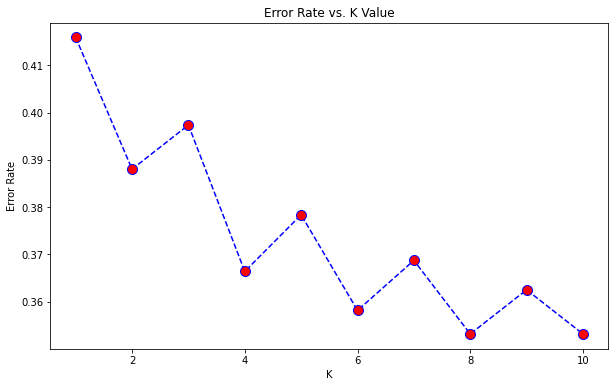

In [ ]:

plt.figure(figsize=(10,6))
plt.plot(range(1,11),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)# Predict 
y_pred = knn.predict(X_test)

In [ ]:
print("The accuracy score is : ", accuracy_score(y_test,y_pred))

The accuracy score is :  0.631284046692607


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.65      0.74      0.69      3597
         1.0       0.60      0.50      0.54      2828

    accuracy                           0.63      6425
   macro avg       0.62      0.62      0.62      6425
weighted avg       0.63      0.63      0.63      6425



**BOOSTING**

In [ ]:
import xgboost as xgb
clf = xgb.XGBClassifier(n_estimators=10000)
eval_set  = [(X_sm,y_sm), (X_test,y_test)]

clf.fit(X_sm, y_sm, eval_set=eval_set,
        eval_metric="auc", early_stopping_rounds=30)

[0]	validation_0-auc:0.702235	validation_1-auc:0.676333
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.710221	validation_1-auc:0.680217
[2]	validation_0-auc:0.710315	validation_1-auc:0.68189
[3]	validation_0-auc:0.714245	validation_1-auc:0.684754
[4]	validation_0-auc:0.716949	validation_1-auc:0.686045
[5]	validation_0-auc:0.7191	validation_1-auc:0.688894
[6]	validation_0-auc:0.719281	validation_1-auc:0.688596
[7]	validation_0-auc:0.719558	validation_1-auc:0.688891
[8]	validation_0-auc:0.719923	validation_1-auc:0.689583
[9]	validation_0-auc:0.722922	validation_1-auc:0.691753
[10]	validation_0-auc:0.723029	validation_1-auc:0.691723
[11]	validation_0-auc:0.723367	validation_1-auc:0.692163
[12]	validation_0-auc:0.723021	validation_1-auc:0.69156
[13]	validation_0-auc:0.723308	validation_1-auc:0.691996
[14]	validation_0-auc:0.723988	validation_1-auc:0.691813
[1

XGBClassifier(n_estimators=10000)

**HYPER PARAMETET TUNNING**

In [ ]:
parameters={"learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30,0.50,0.85 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10,],
 "min_child_weight" : [ 1, 3, 5, 7,9,11 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4,0.5,0.6,0.7 ],
 "n_estimators"     : [25,50,100,150,200,500,1000,2000],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ] }

from sklearn.model_selection import RandomizedSearchCV
clf = RandomizedSearchCV(xgb.XGBClassifier(), parameters, random_state=0)
search = clf.fit(X_sm,y_sm)
search.best_params_

{'n_estimators': 25,
 'min_child_weight': 3,
 'max_depth': 4,
 'learning_rate': 0.1,
 'gamma': 0.1,
 'colsample_bytree': 0.5}

In [ ]:
xgbc = xgb.XGBClassifier(params=search.best_params_)
xgbc.fit(X_sm,y_sm)
ypred=xgbc.predict(X_test)

import sklearn.metrics as metrik
print(metrik.confusion_matrix(y_test,ypred))
print(metrik.accuracy_score(y_test,ypred))

[[2933  563]
 [1545 1384]]
0.6719066147859922


**Bagging**

In [56]:
from sklearn.neighbors import KNeighborsClassifier#USING KNN
KNN1=KNeighborsClassifier() ## model object creation
KNN1.fit(X_train,y_train)  ## fitting the model
y_hat_knn=KNN1.predict(X_test) ## getting the predict from created model

In [53]:
from sklearn.ensemble import BaggingClassifier #import bagging 

## model object creation
model_bagg1=BaggingClassifier(base_estimator=KNN1,n_estimators=300) 

# base_estimator---> algorithm which you want to pass
# n_estimators-----> number of base learners


## fitting the model
model_bagg1.fit(X_sm,y_sm) 


## getting the prediction
y_hat_bagg=model_bagg1.predict(X_test) 

In [58]:
from sklearn.metrics import f1_score 
f1_knn=f1_score(y_test,y_hat_knn,average='weighted')#checking model performance 
f1_knn

0.5496281601544214

In [59]:
f1_bagg=f1_score(y_test,y_hat_bagg,average='weighted')
f1_bagg

0.545792242146503

In [61]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,\
precision_score,classification_report,f1_score

In [62]:
print(classification_report(y_test,y_hat_bagg))

              precision    recall  f1-score   support

         0.0       0.59      0.56      0.57      3496
         1.0       0.50      0.53      0.51      2929

    accuracy                           0.55      6425
   macro avg       0.54      0.54      0.54      6425
weighted avg       0.55      0.55      0.55      6425



**Model Comparision Report**

For the given dataset, we have used different machine learning algorithems and respective Accuracy of each model is tabulated below.

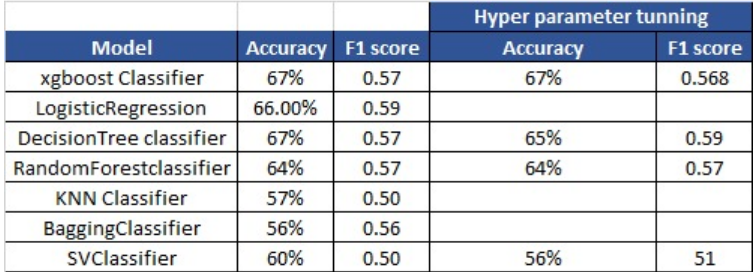

Hence from the above tabular column we can conclude that Xgboost classifier works best for the given dataset with 67% Accuracy.

**Report on Challenges faced**

1. Even though performing** Hyper Parameter Tuning** for several algorithms, the accuracy did not increase more than 67%